In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


In [2]:
data=pd.read_csv('anime.csv')

In [3]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
data.shape

(12294, 7)

In [5]:
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
data= data.dropna()

In [7]:
data.shape

(12017, 7)

In [8]:
#just to verify
data.isna().sum()


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [9]:
data.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
data.value_counts()

anime_id  name                                                       genre                                            type     episodes  rating  members
1         Cowboy Bebop                                               Action, Adventure, Comedy, Drama, Sci-Fi, Space  TV       26        8.82    486824     1
19069     Okane wa Mawaru: Kurashi to Kinyuu                         Slice of Life                                    OVA      1         5.31    92         1
19021     Takanashi Rikka Kai: Chuunibyou demo Koi ga Shitai! Movie  Comedy, Drama, Romance, School, Slice of Life    Movie    1         7.37    34272      1
19023     Wake Up, Girls!                                            Drama, Music                                     TV       12        7.04    29679      1
19029     Yuyushiki: Nyanyashiki                                     Comedy                                           Special  6         6.32    6805       1
                                                         

In [11]:
data['name'].value_counts()

Shi Wan Ge Leng Xiaohua                                                                            2
Saru Kani Gassen                                                                                   2
CCW: Crazy Clay Wrestling                                                                          1
Crayon Angel                                                                                       1
Koumon-teki Juuku Ketsujiru Juke                                                                   1
                                                                                                  ..
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki                            1
Beet the Vandel Buster Excellion                                                                   1
Black Jack ONA                                                                                     1
Crayon Shin-chan Manatsu no Yoru ni Ora Sanjou! Arashi wo Yobu Den-O vs. Shin-O 60-bu Speci

In [12]:
data.shape

(12017, 7)

In [13]:
data['name'].drop_duplicates(inplace=True)

In [14]:
len(data['name'].unique())

12015

In [15]:
data.shape

(12017, 7)

In [16]:
data.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [17]:
data[data['name']=='Shi Wan Ge Leng Xiaohua']

,anime_id,name,genre,type,episodes,rating,members
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
categories=data['type'].unique()
values=data['type'].value_counts().values

Text(0.5, 1.0, 'Types of Animes')

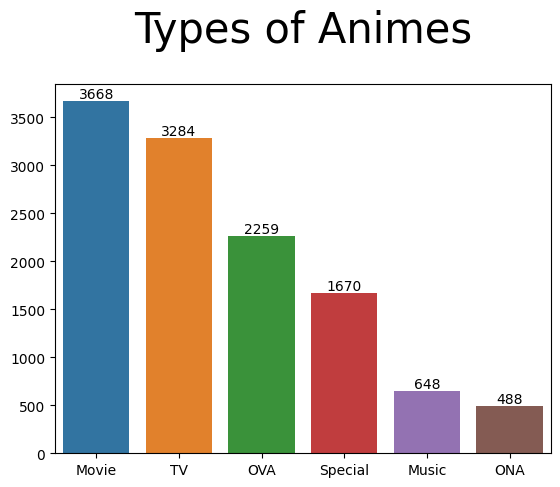

In [20]:
ax=sns.barplot(x=categories,y=values)
for value in ax.containers:
    ax.bar_label(value)
plt.title('Types of Animes',fontsize=30,pad=30)

<Axes: >

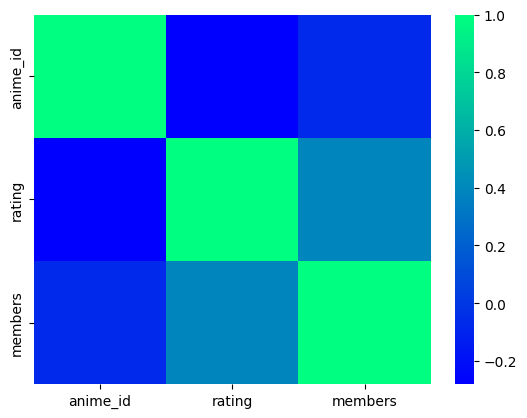

In [21]:
sns.heatmap(data.corr(),cmap='winter')

In [22]:
data=data.drop('anime_id',axis=1)

In [23]:
genres=[]
for values in data['genre']:
    for uni_val in values.split(','):
        genres.append(uni_val)

In [24]:
unique_gens=[]
for genre in genres:
    if genre not in unique_gens:
        unique_gens.append(genre)
genres_count=[genres.count(val) for val in unique_gens]
#genres_count

In [25]:
genre=pd.DataFrame({'Type':unique_gens,'count':genres_count})

In [26]:
data.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Text(0.5, 1.0, 'Top 10 Anime Genres Count')

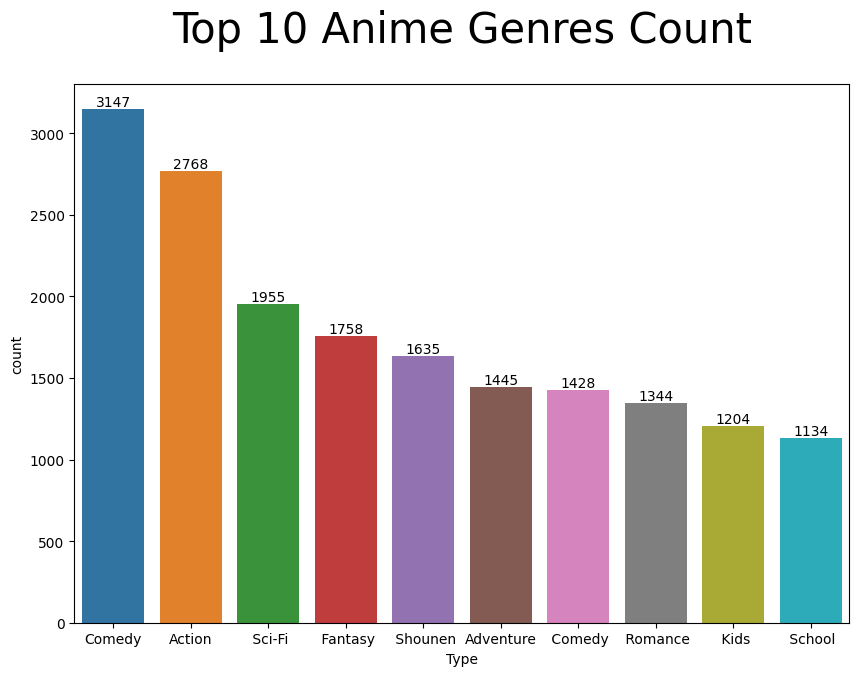

In [27]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x=genre.sort_values(by='count',ascending=False).iloc[:,0][:10],y=genre.sort_values(by='count',ascending=False).iloc[:,1][:10])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 10 Anime Genres Count',pad=30,fontsize=30)

Text(0.5, 1.0, 'Last 10 Anime Genre Count')

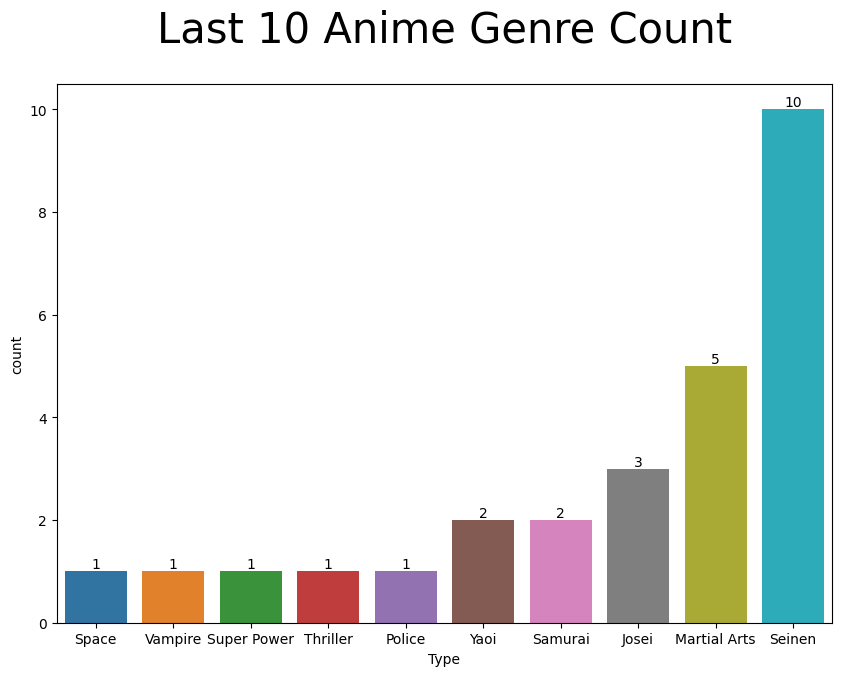

In [28]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x=genre.sort_values(by='count',ascending=True).iloc[:,0][:10],y=genre.sort_values(by='count',ascending=True).iloc[:,1][:10])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Last 10 Anime Genre Count',pad=30,fontsize=30)

In [29]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [30]:
data.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [31]:
df=data.copy()

In [32]:
df['rating']= std.fit_transform(df[['rating']])
df['members']= std.fit_transform(df[['members']])


In [33]:
df.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,2.824474,3.292044
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,2.717032,14.002410
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,2.707265,1.732216
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,2.629126,11.833499
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,2.619358,2.400518


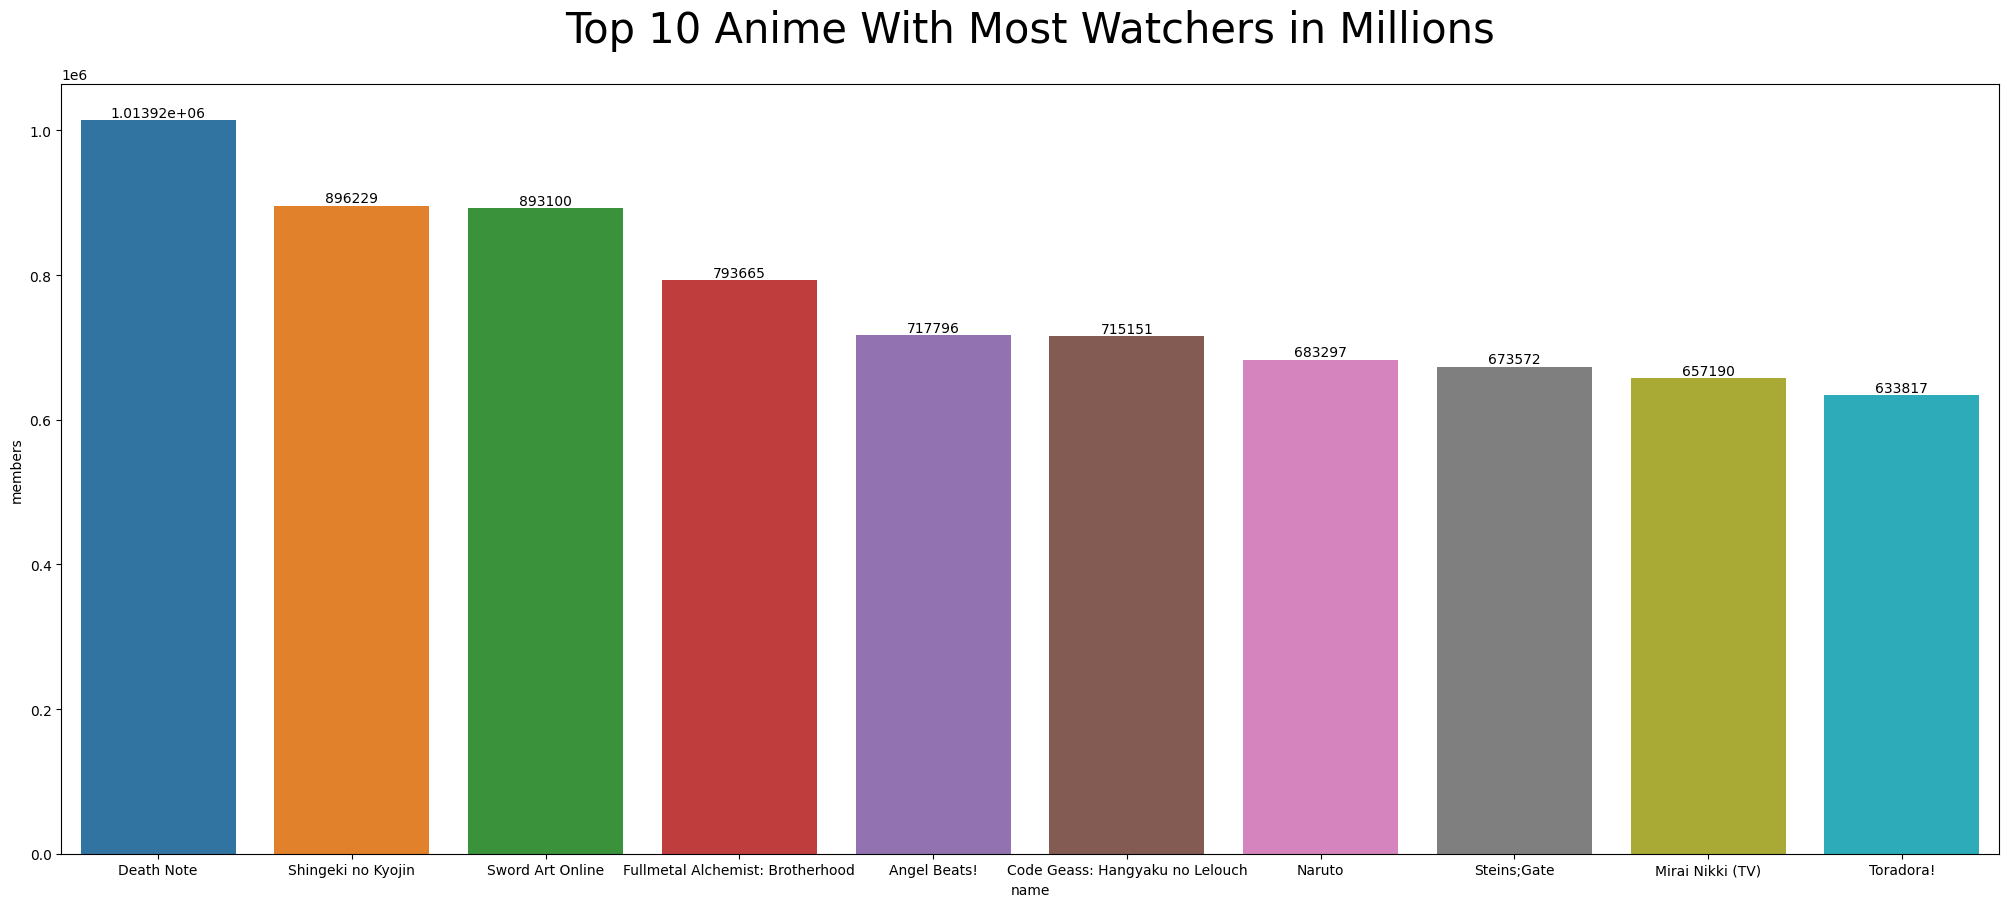

In [34]:
plt.figure(figsize=(25,10))
plt.title('Top 10 Anime With Most Watchers in Millions',pad=30,fontsize=30)
ax=sns.barplot(x=data.sort_values(by='members',ascending=False).iloc[:,0][:10],y=data.sort_values(by='members',ascending=False).iloc[:,5][:10])
for i in ax.containers:
    ax.bar_label(i)

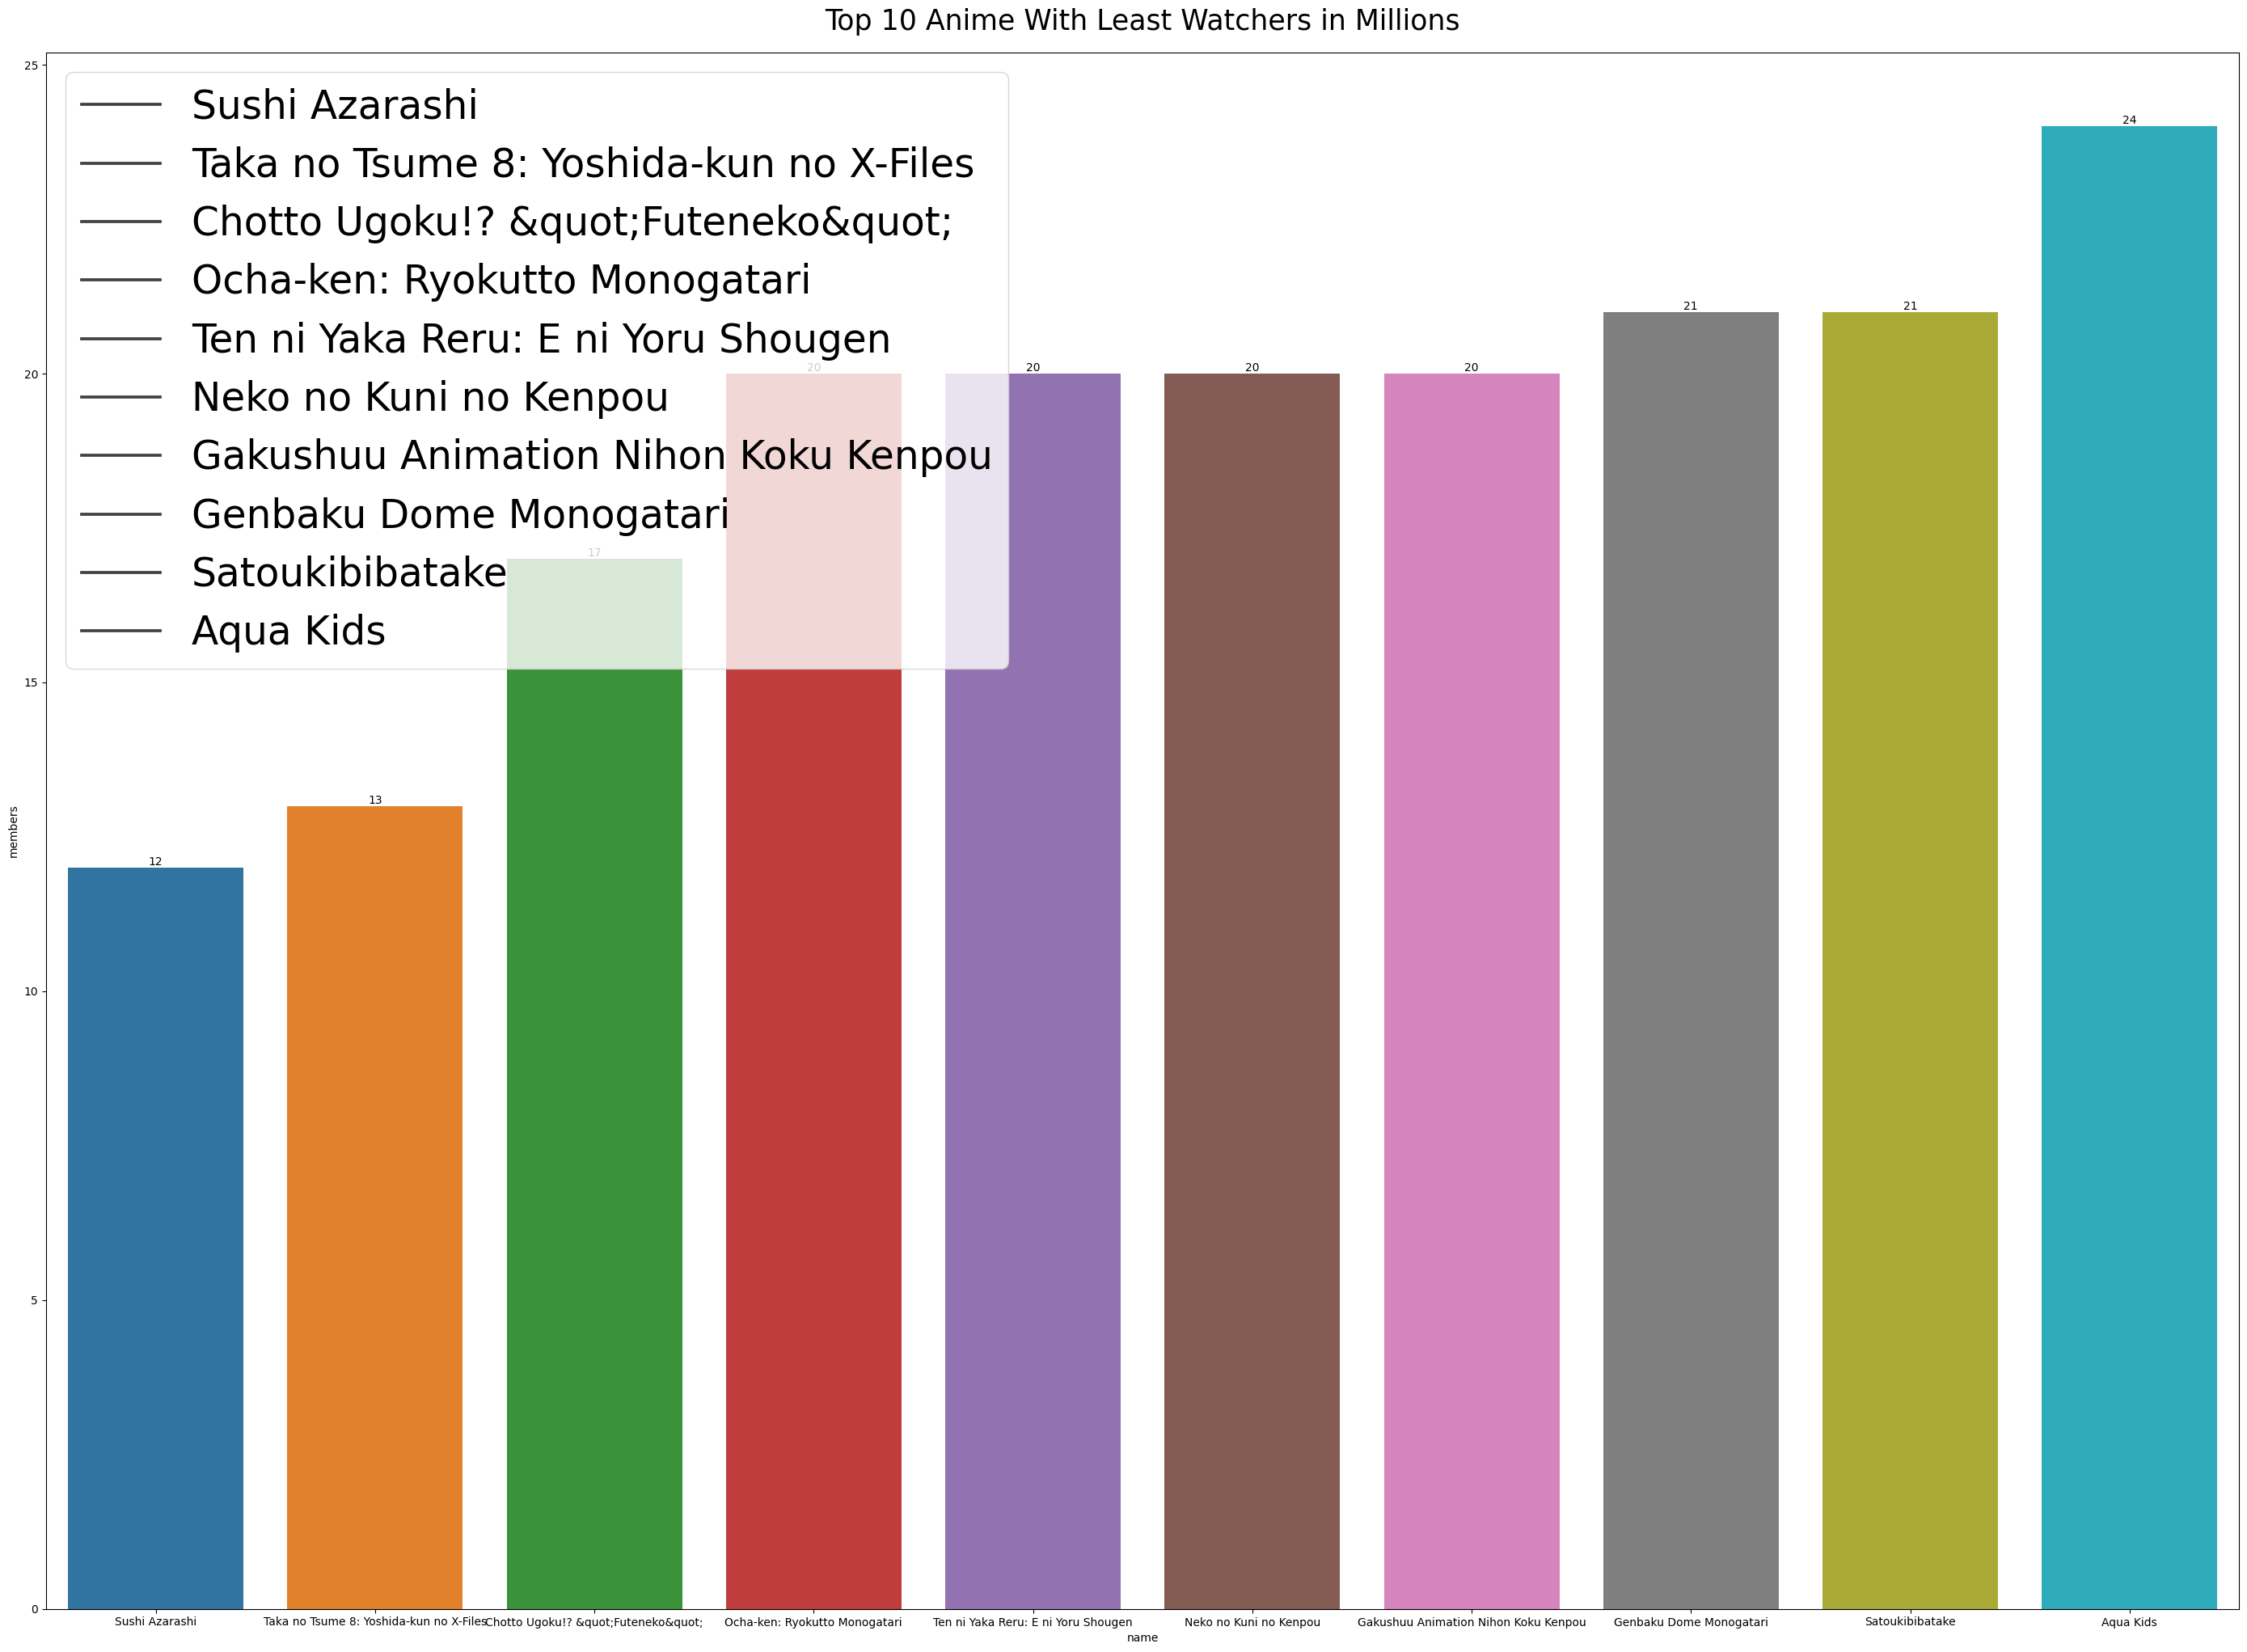

In [35]:
plt.figure(figsize=(35,25))
plt.title('Top 10 Anime With Least Watchers in Millions',pad=20,fontsize=25)
ax=sns.barplot(x=data.sort_values(by='members',ascending=True).iloc[:,0][:10],
               y=data.sort_values(by='members',ascending=True).iloc[:,5][:10])
for i in ax.containers:
    ax.bar_label(i)
plt.legend(data.sort_values(by='members',ascending=True).iloc[:,0][:10],fontsize=35,loc='upper left')

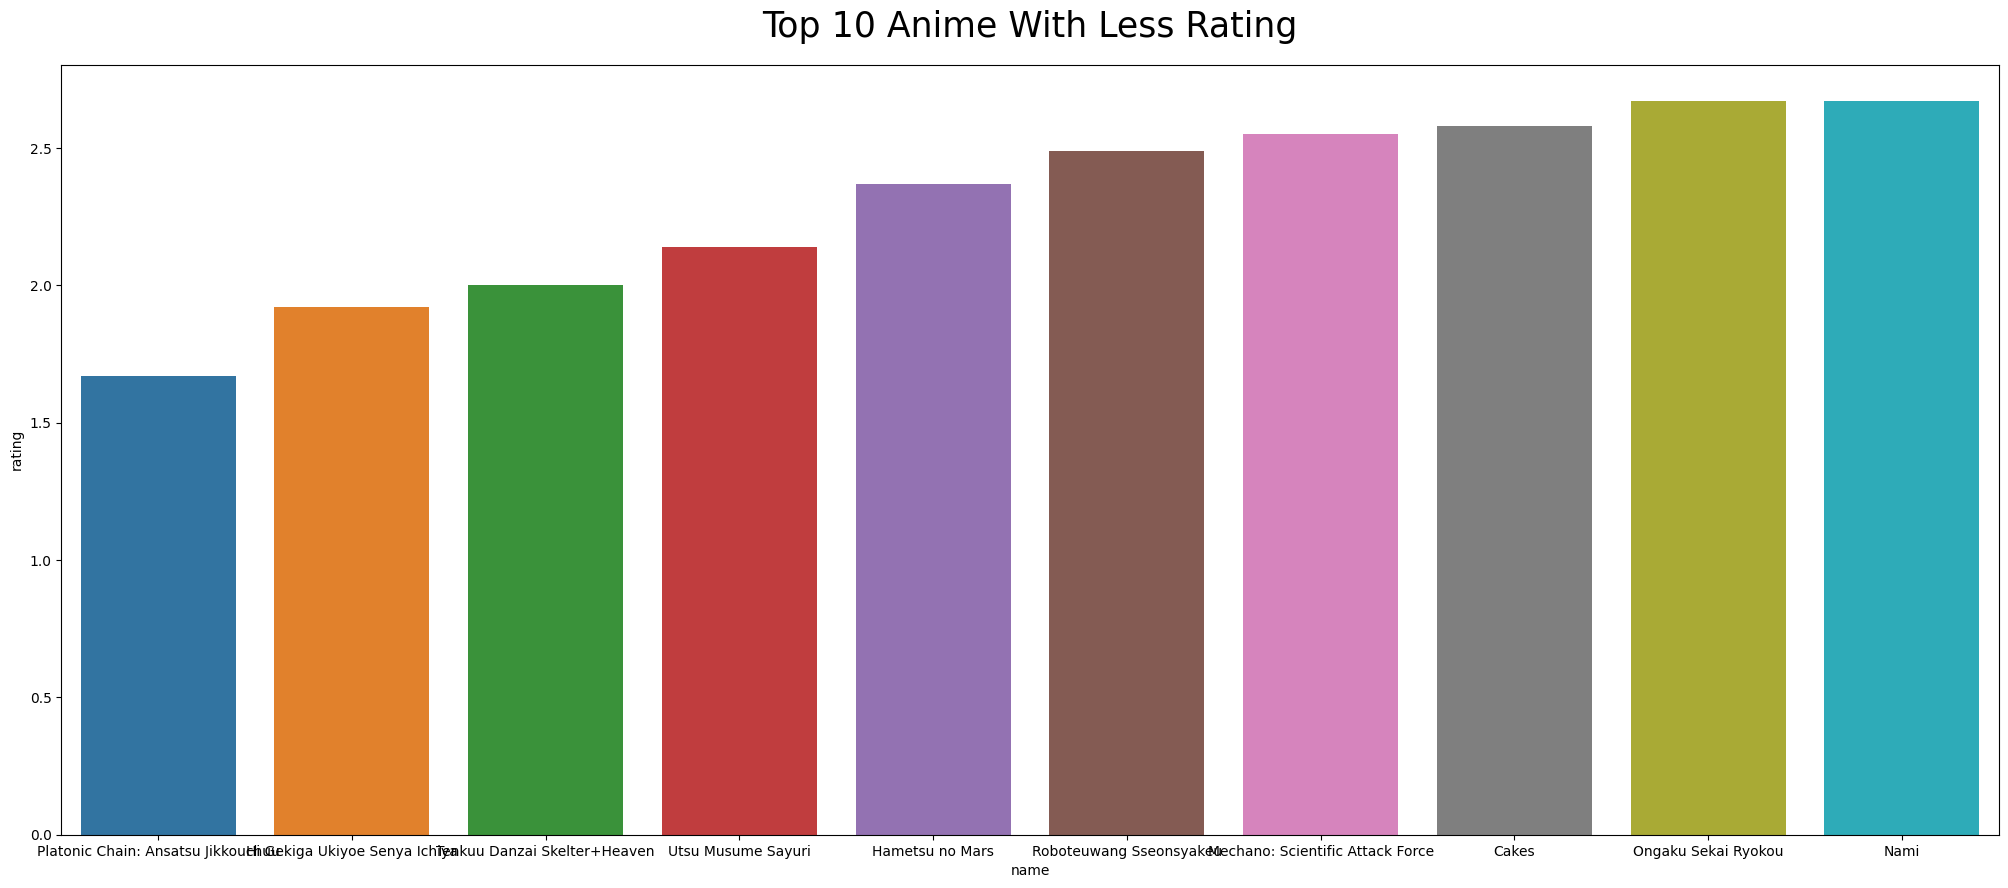

In [36]:
plt.figure(figsize=(25,10))
plt.title('Top 10 Anime With Less Rating',pad=20,fontsize=25)
ax=sns.barplot(x=data.sort_values(by='rating',ascending=True).iloc[:,0][:10],
               y=data.sort_values(by='rating',ascending=True).iloc[:,4][:10])

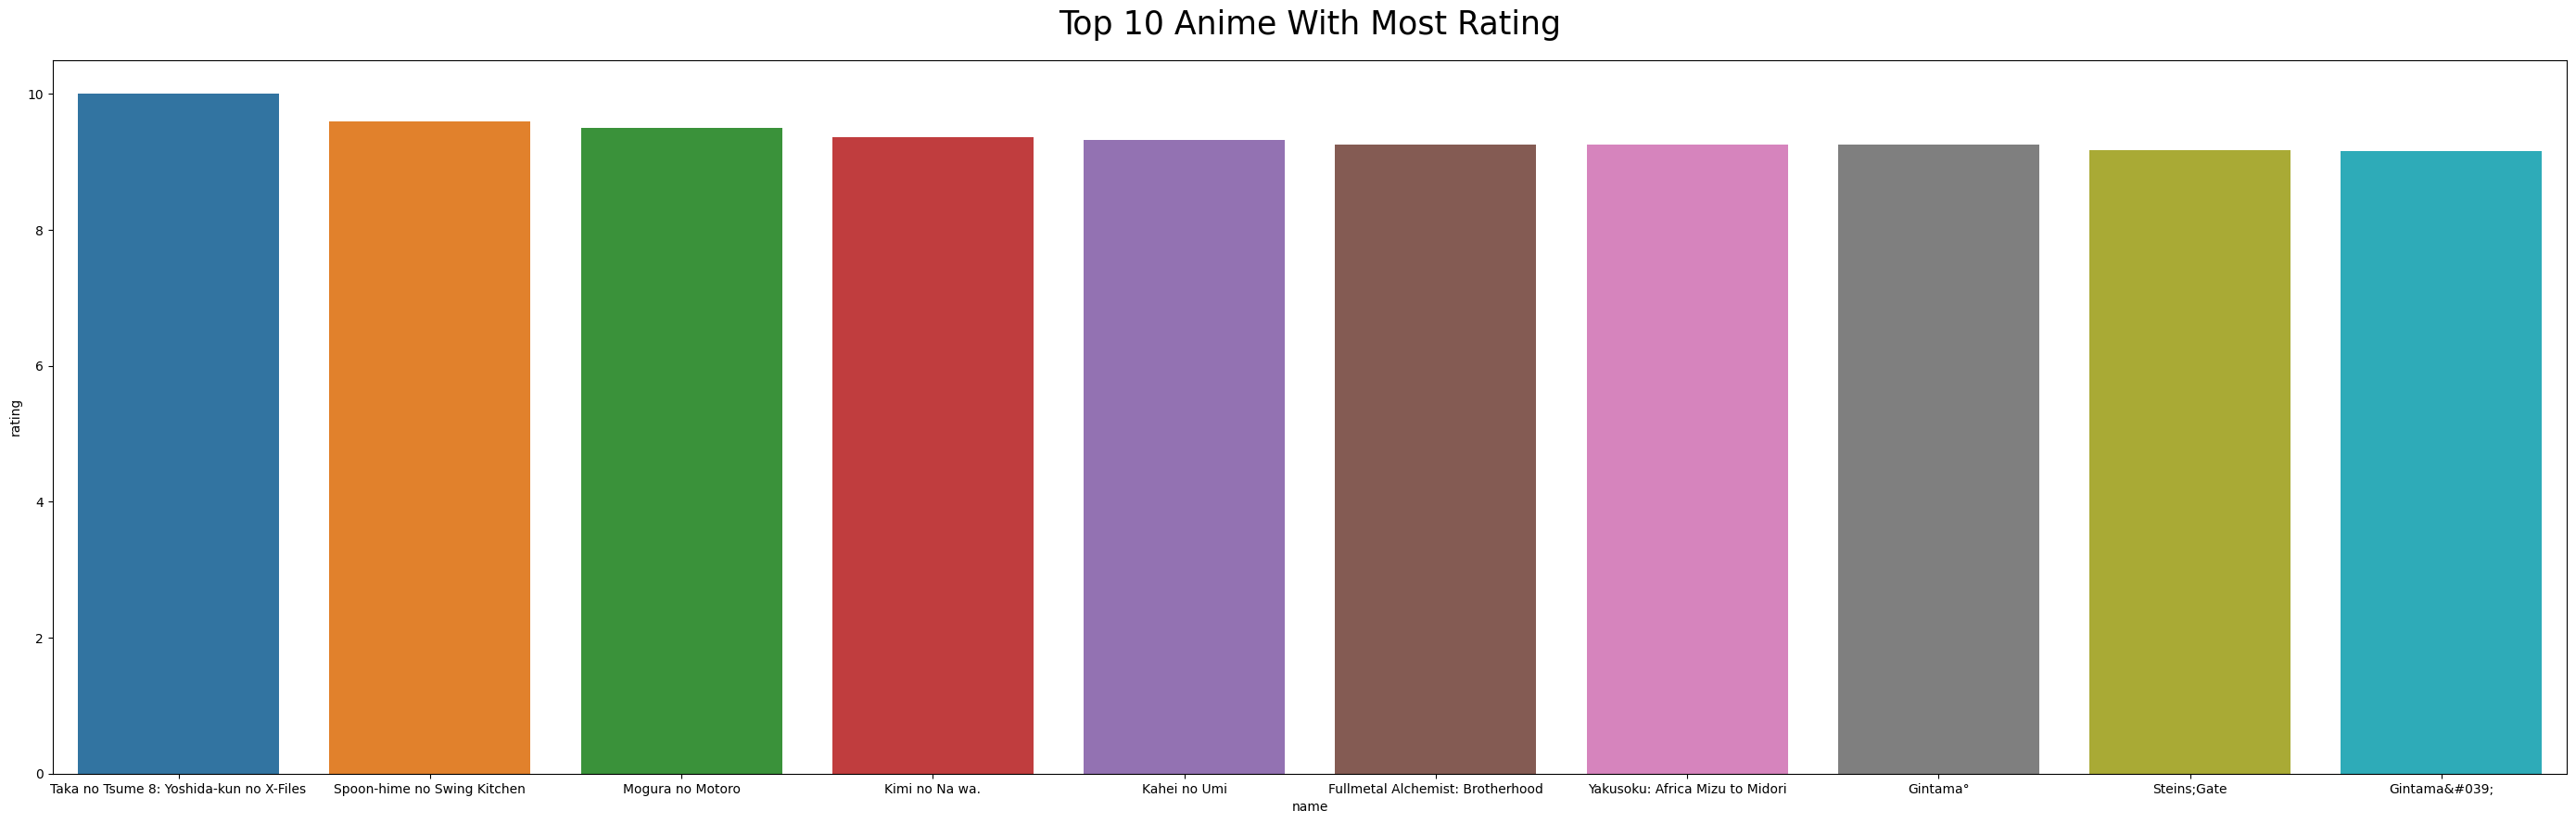

In [37]:
plt.figure(figsize=(35,10))
plt.title('Top 10 Anime With Most Rating',pad=20,fontsize=25)
ax=sns.barplot(x=data.sort_values(by='rating',ascending=False).iloc[:,0][:10],y=data.sort_values(by='rating',ascending=False).iloc[:,4][:10])

In [38]:
data.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [39]:
palette=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r'
         , 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
         'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
         'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
         'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
         'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
         'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
         'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
         'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest'
         , 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r',
         'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
         'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
         'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
         'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
         'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
         'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r'
         , 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r',
         'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
import random
print(random.randint(0,len(palette)))

35


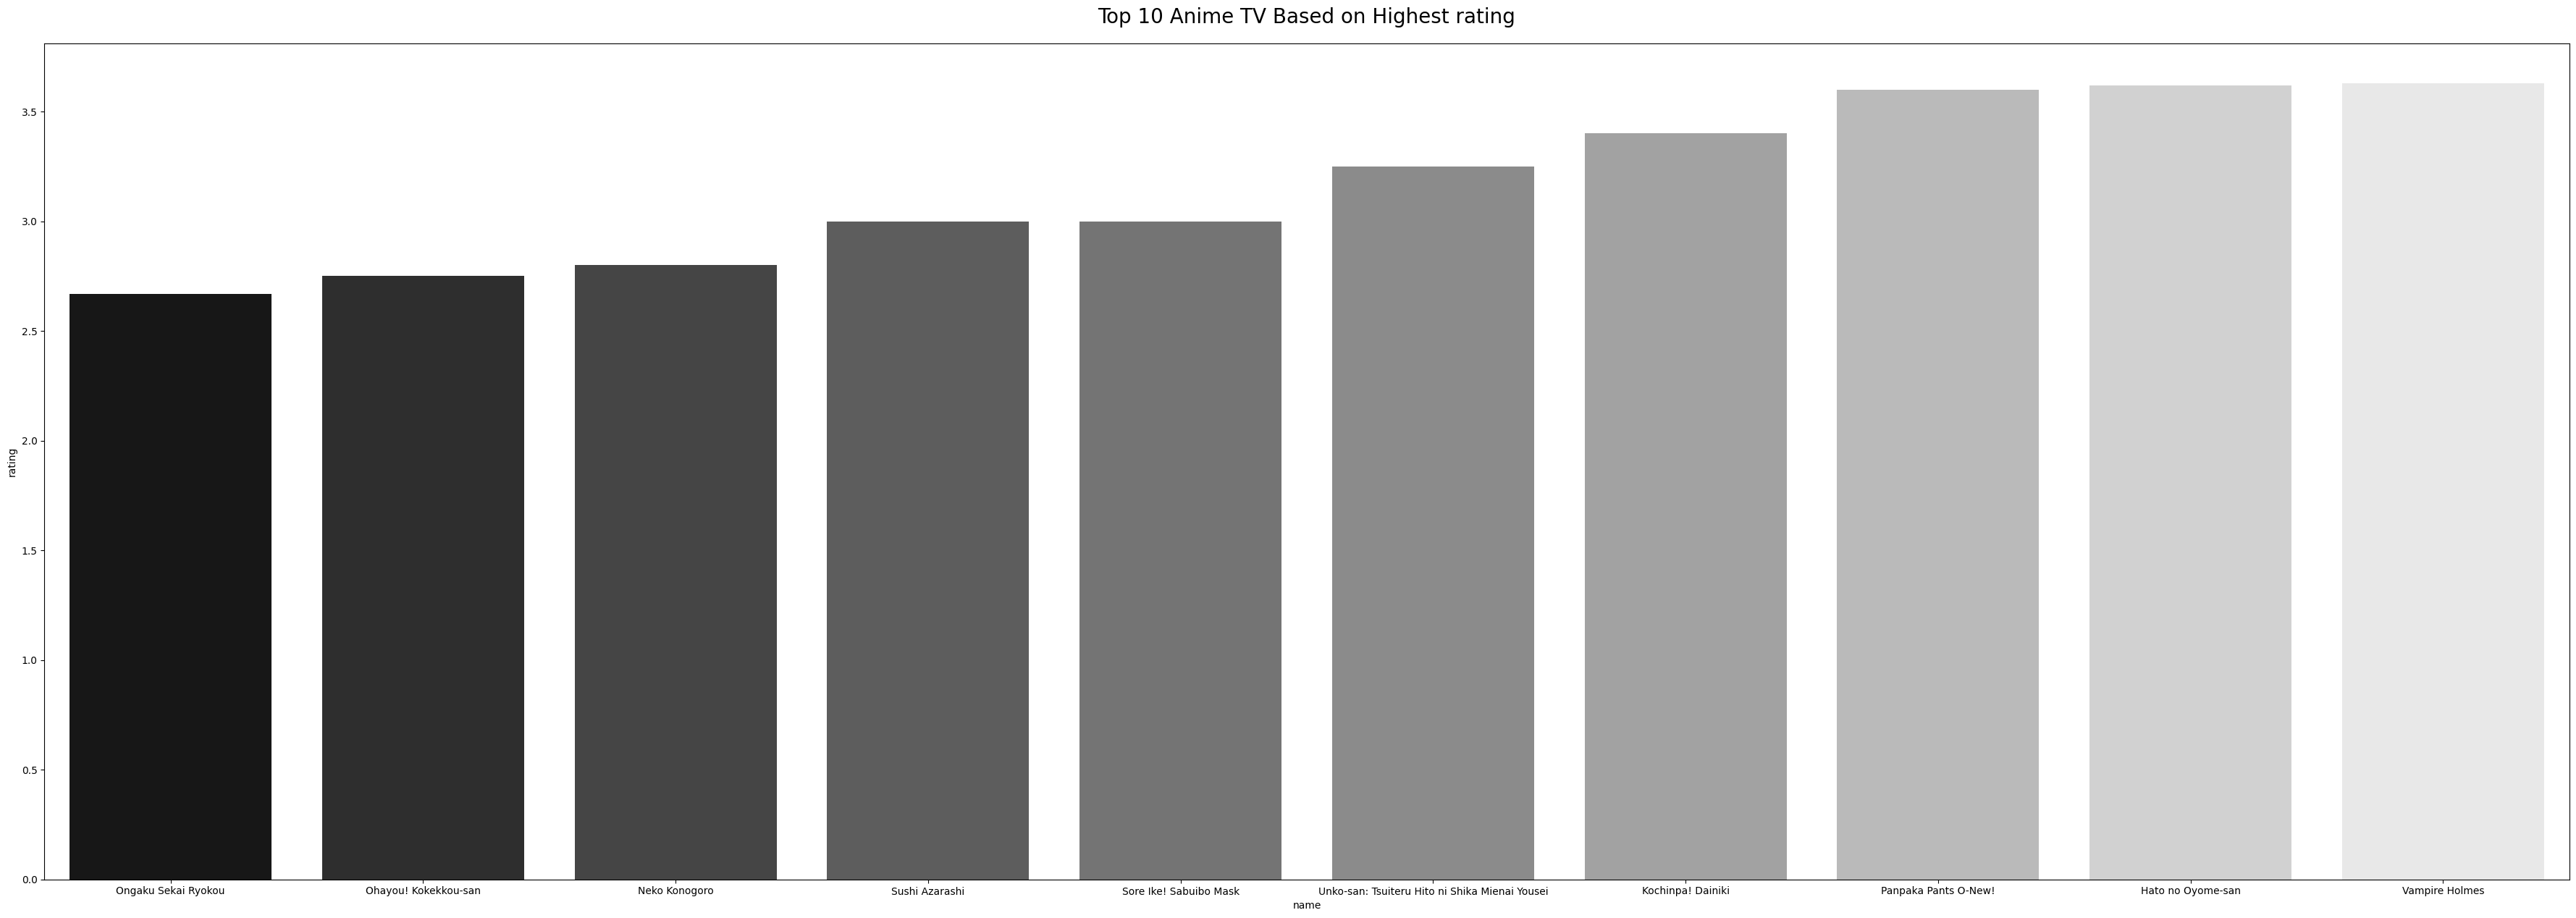

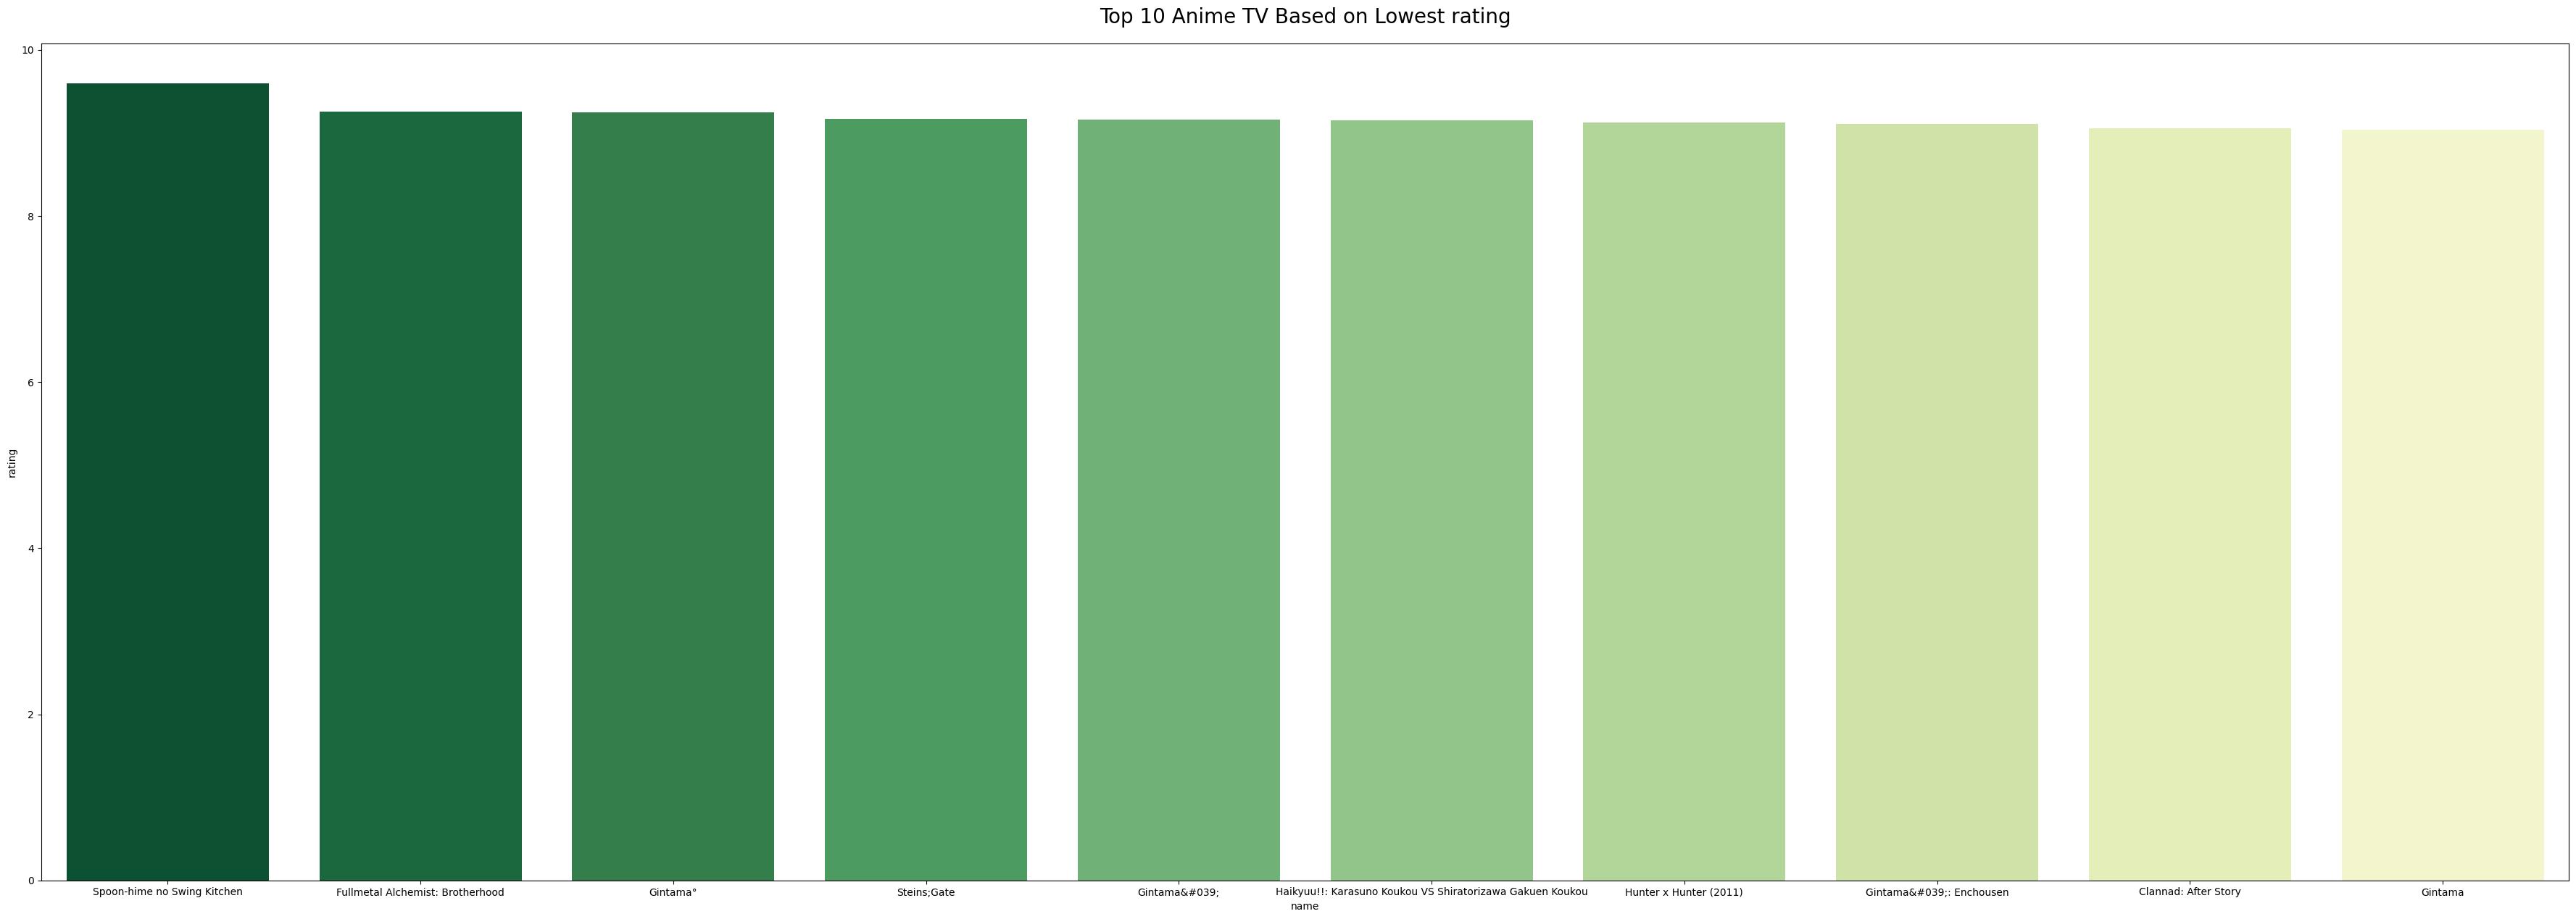

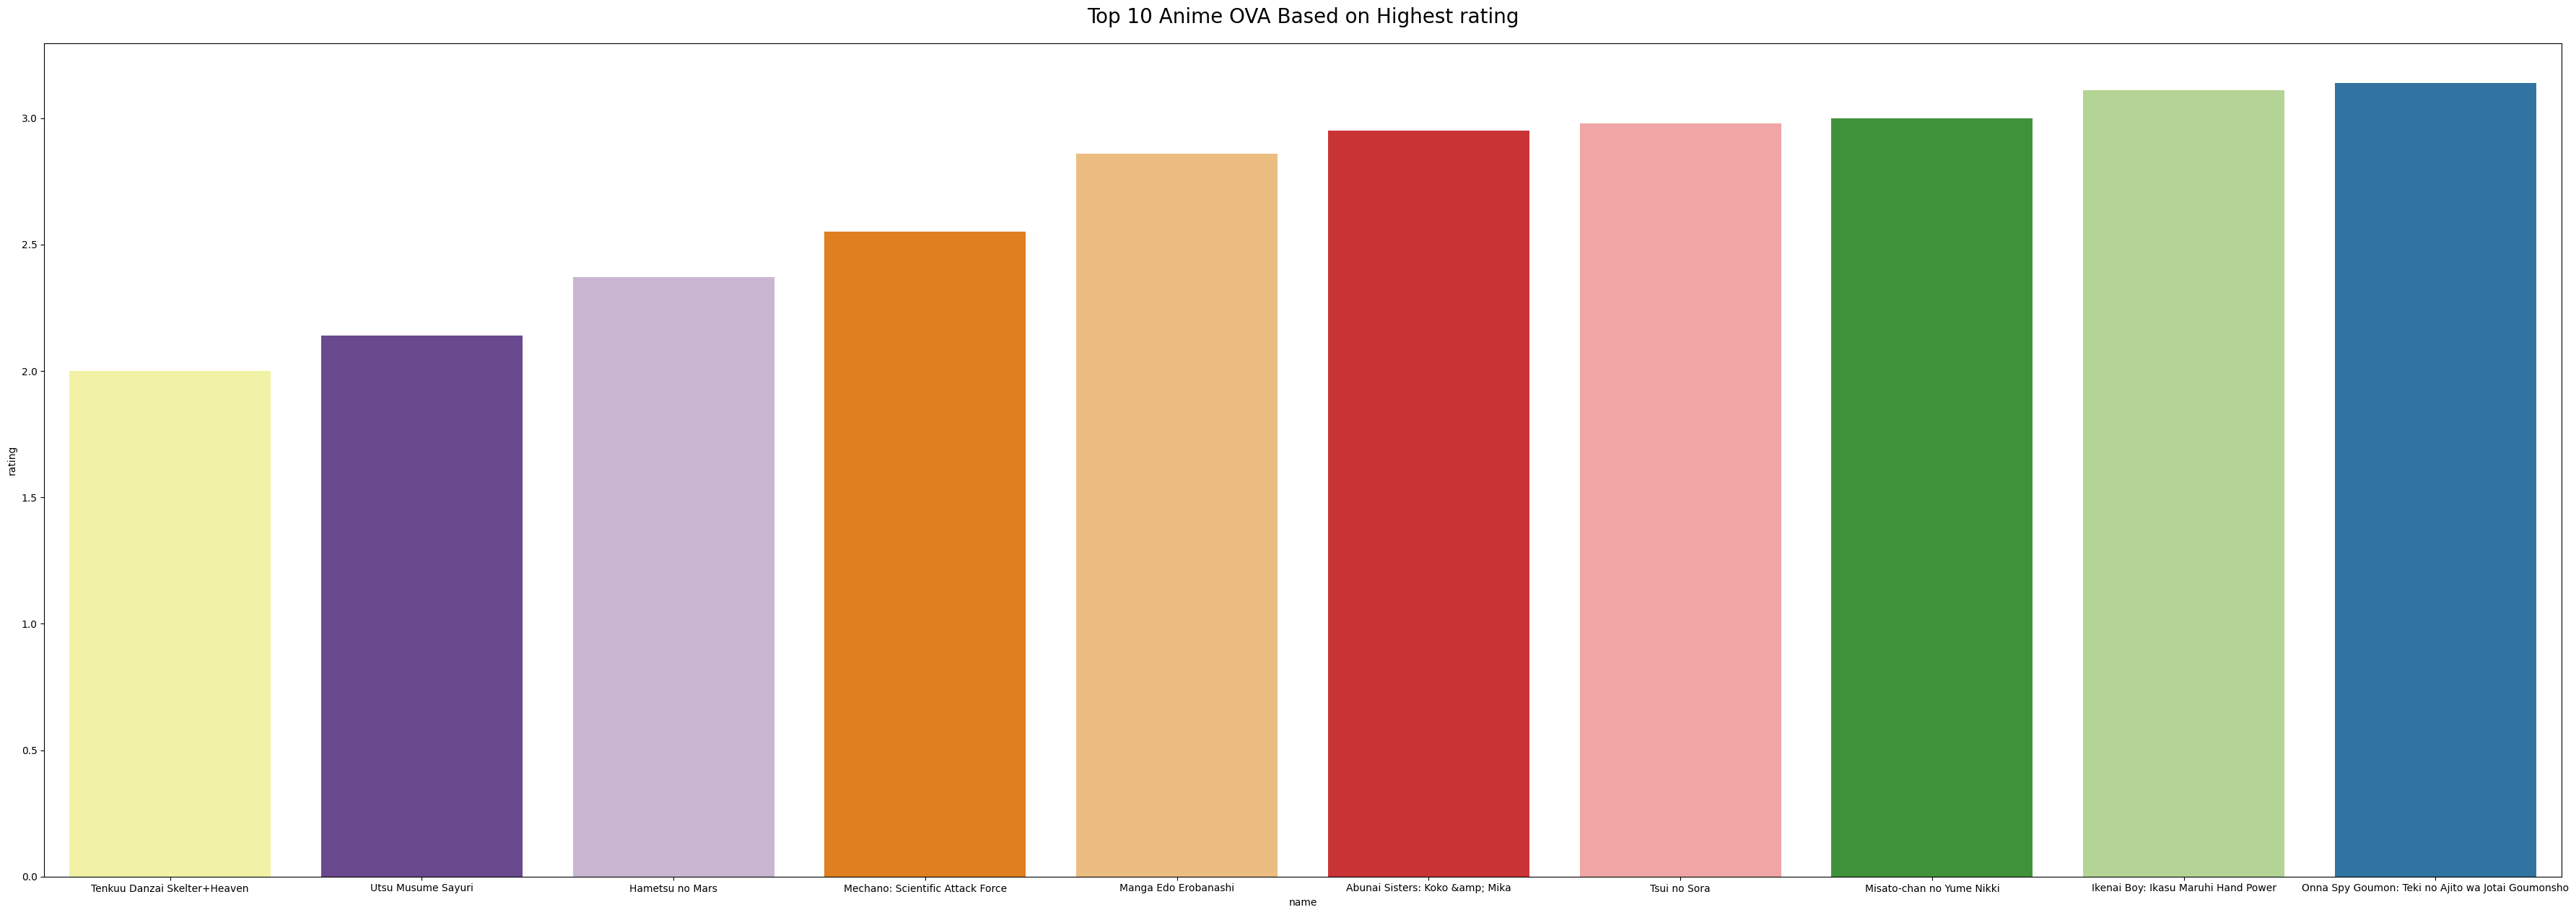

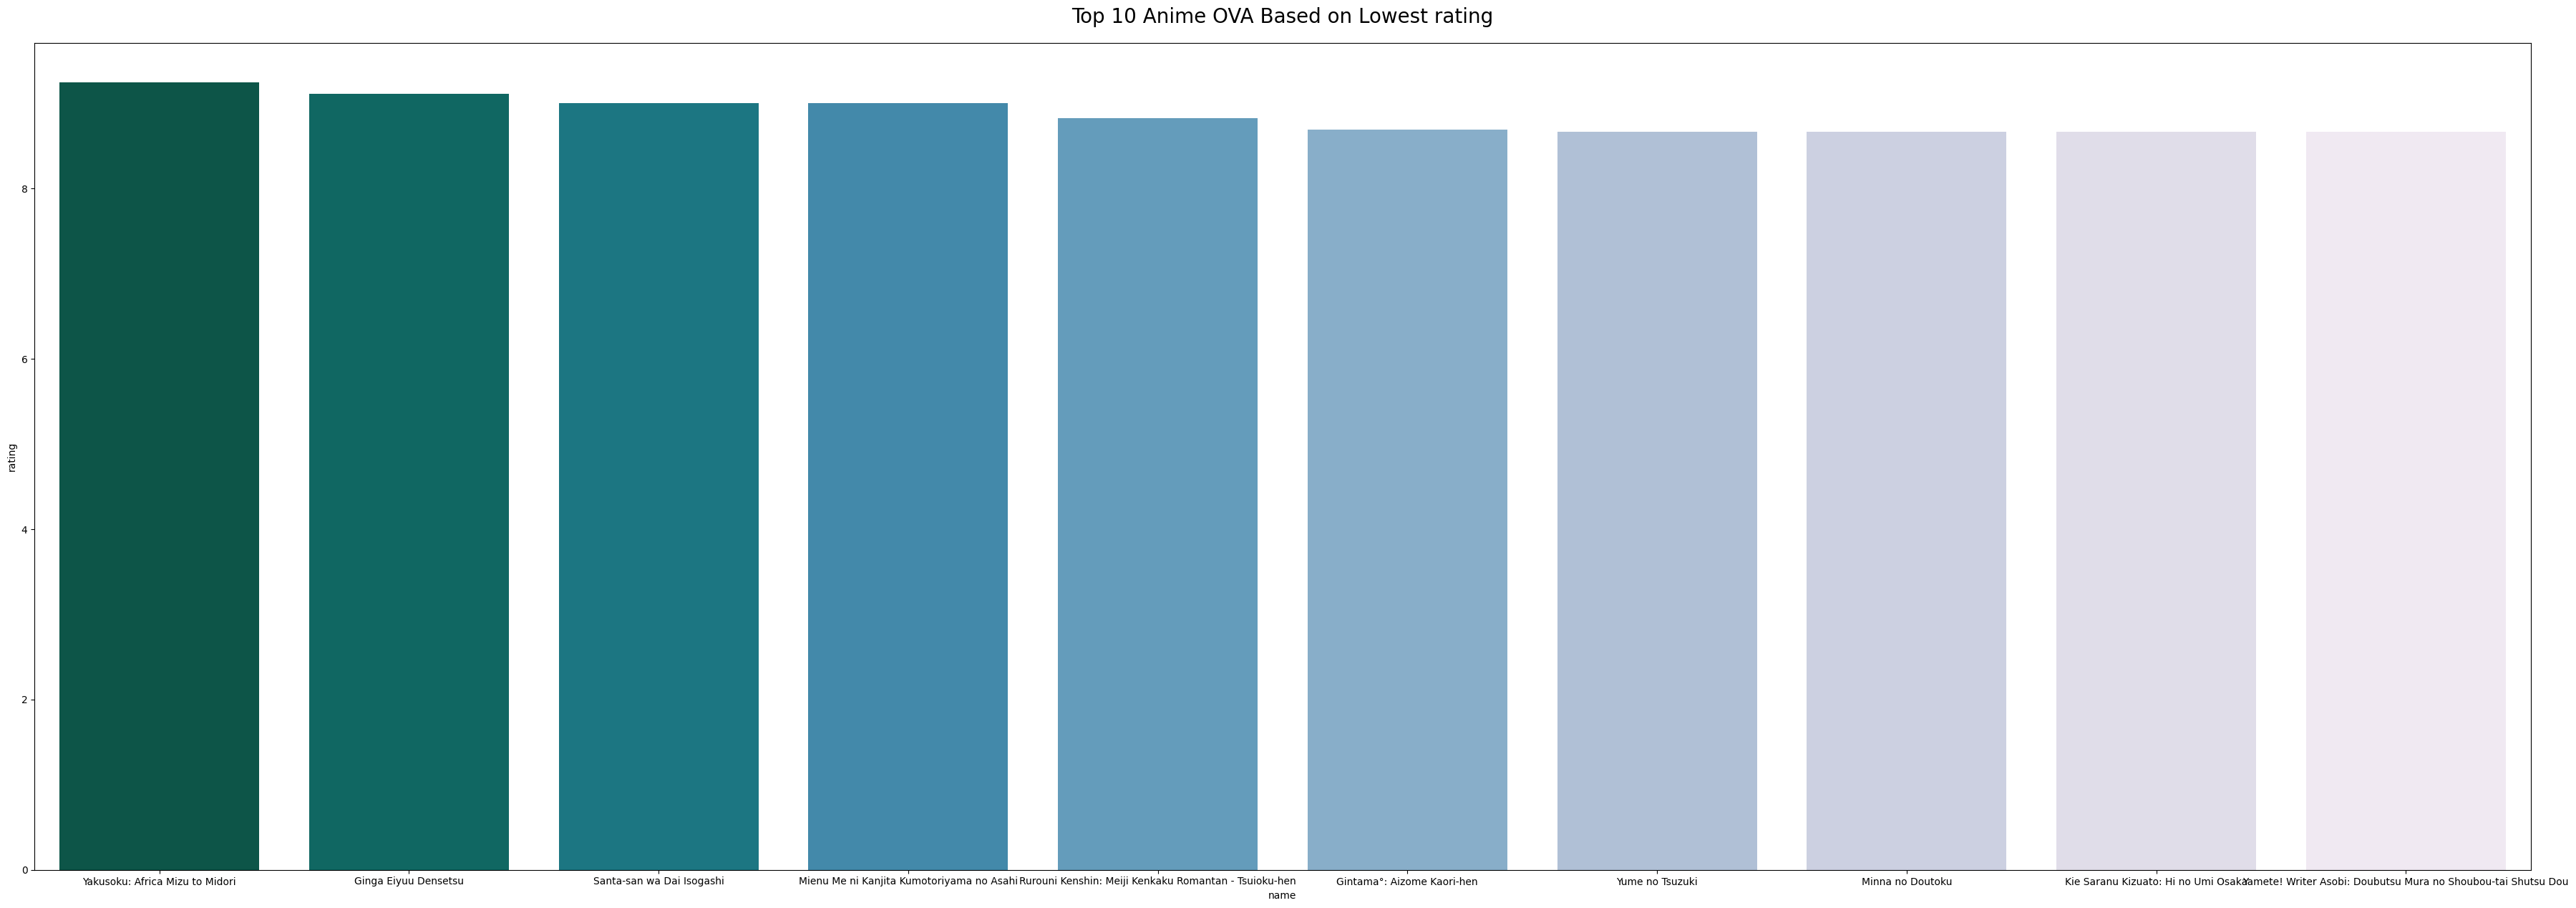

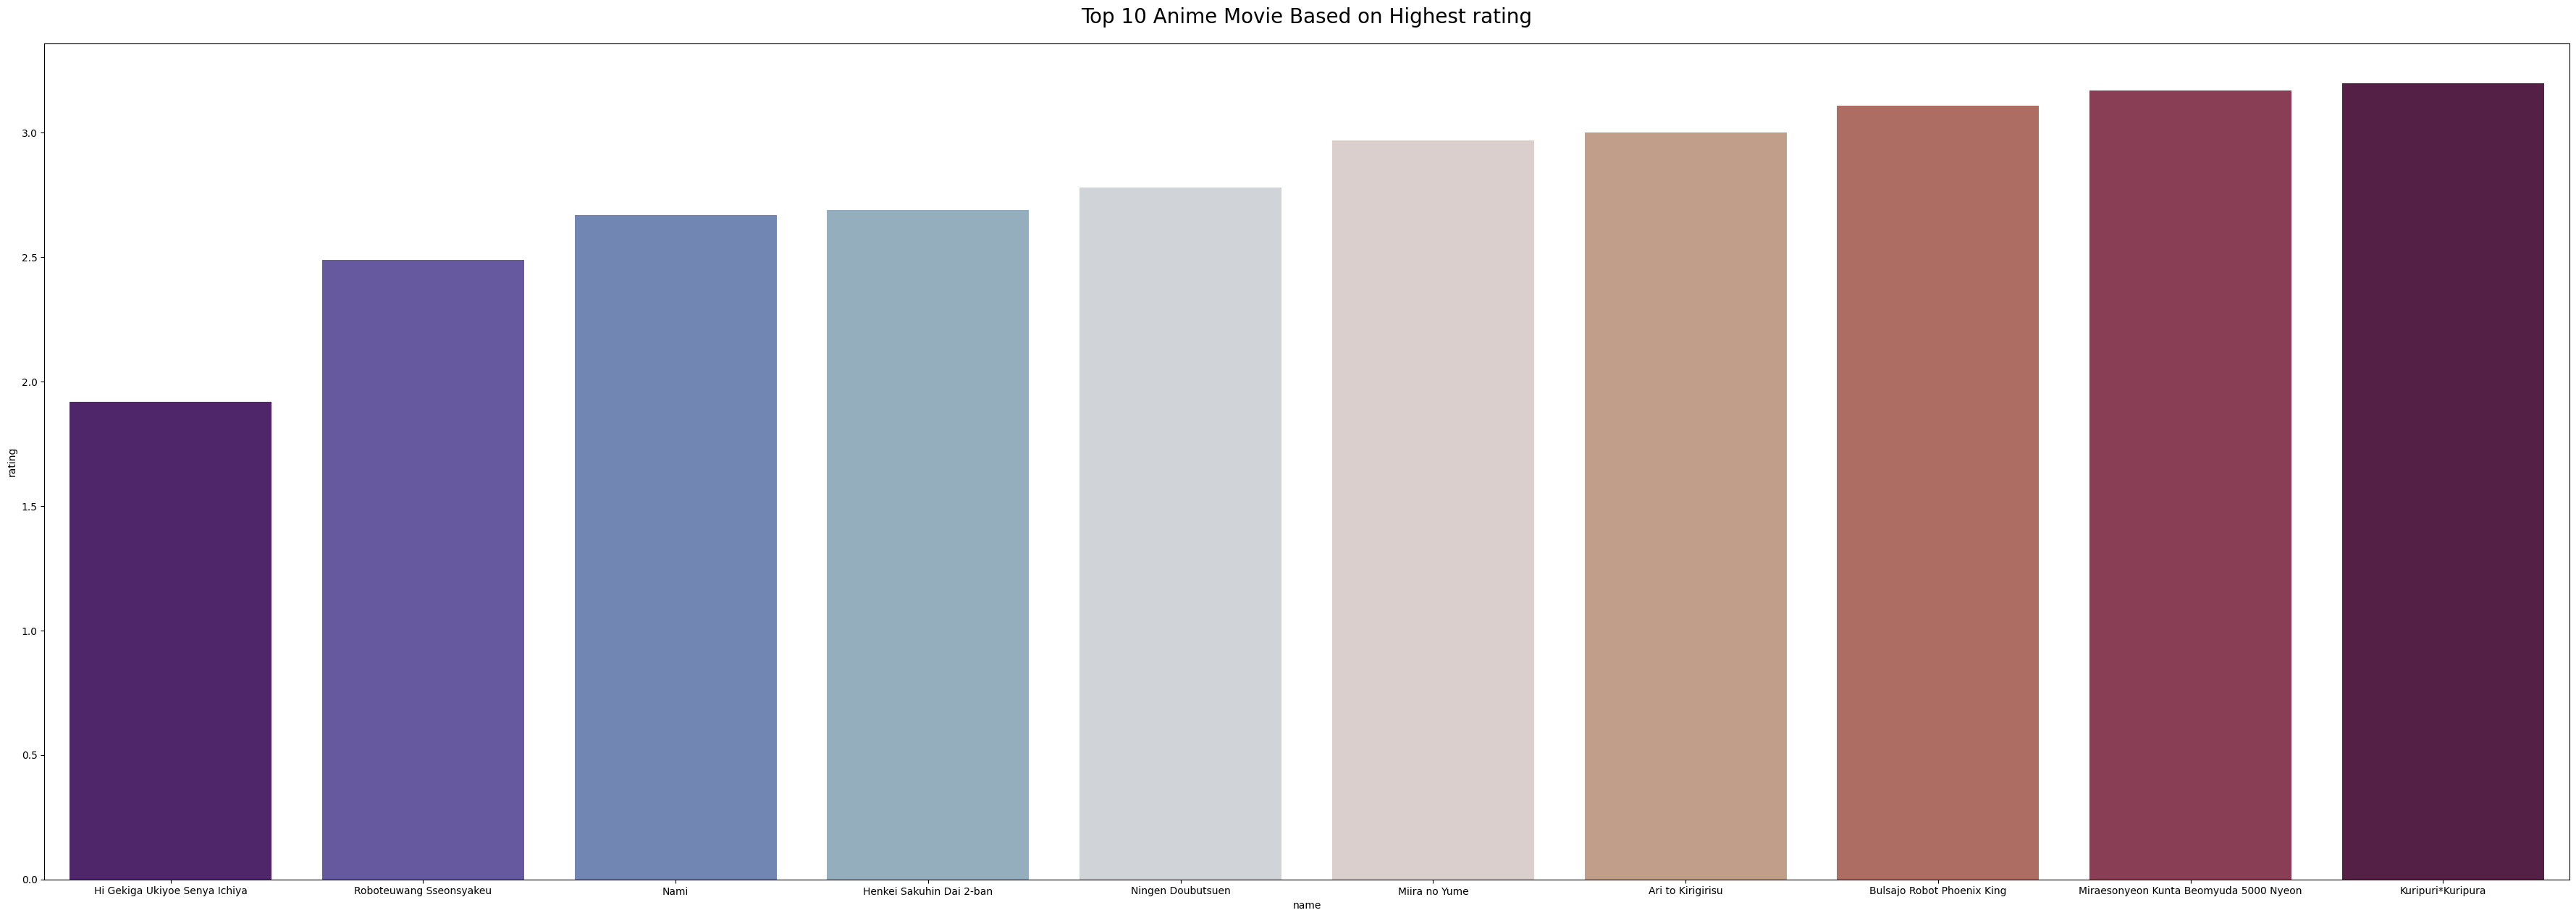

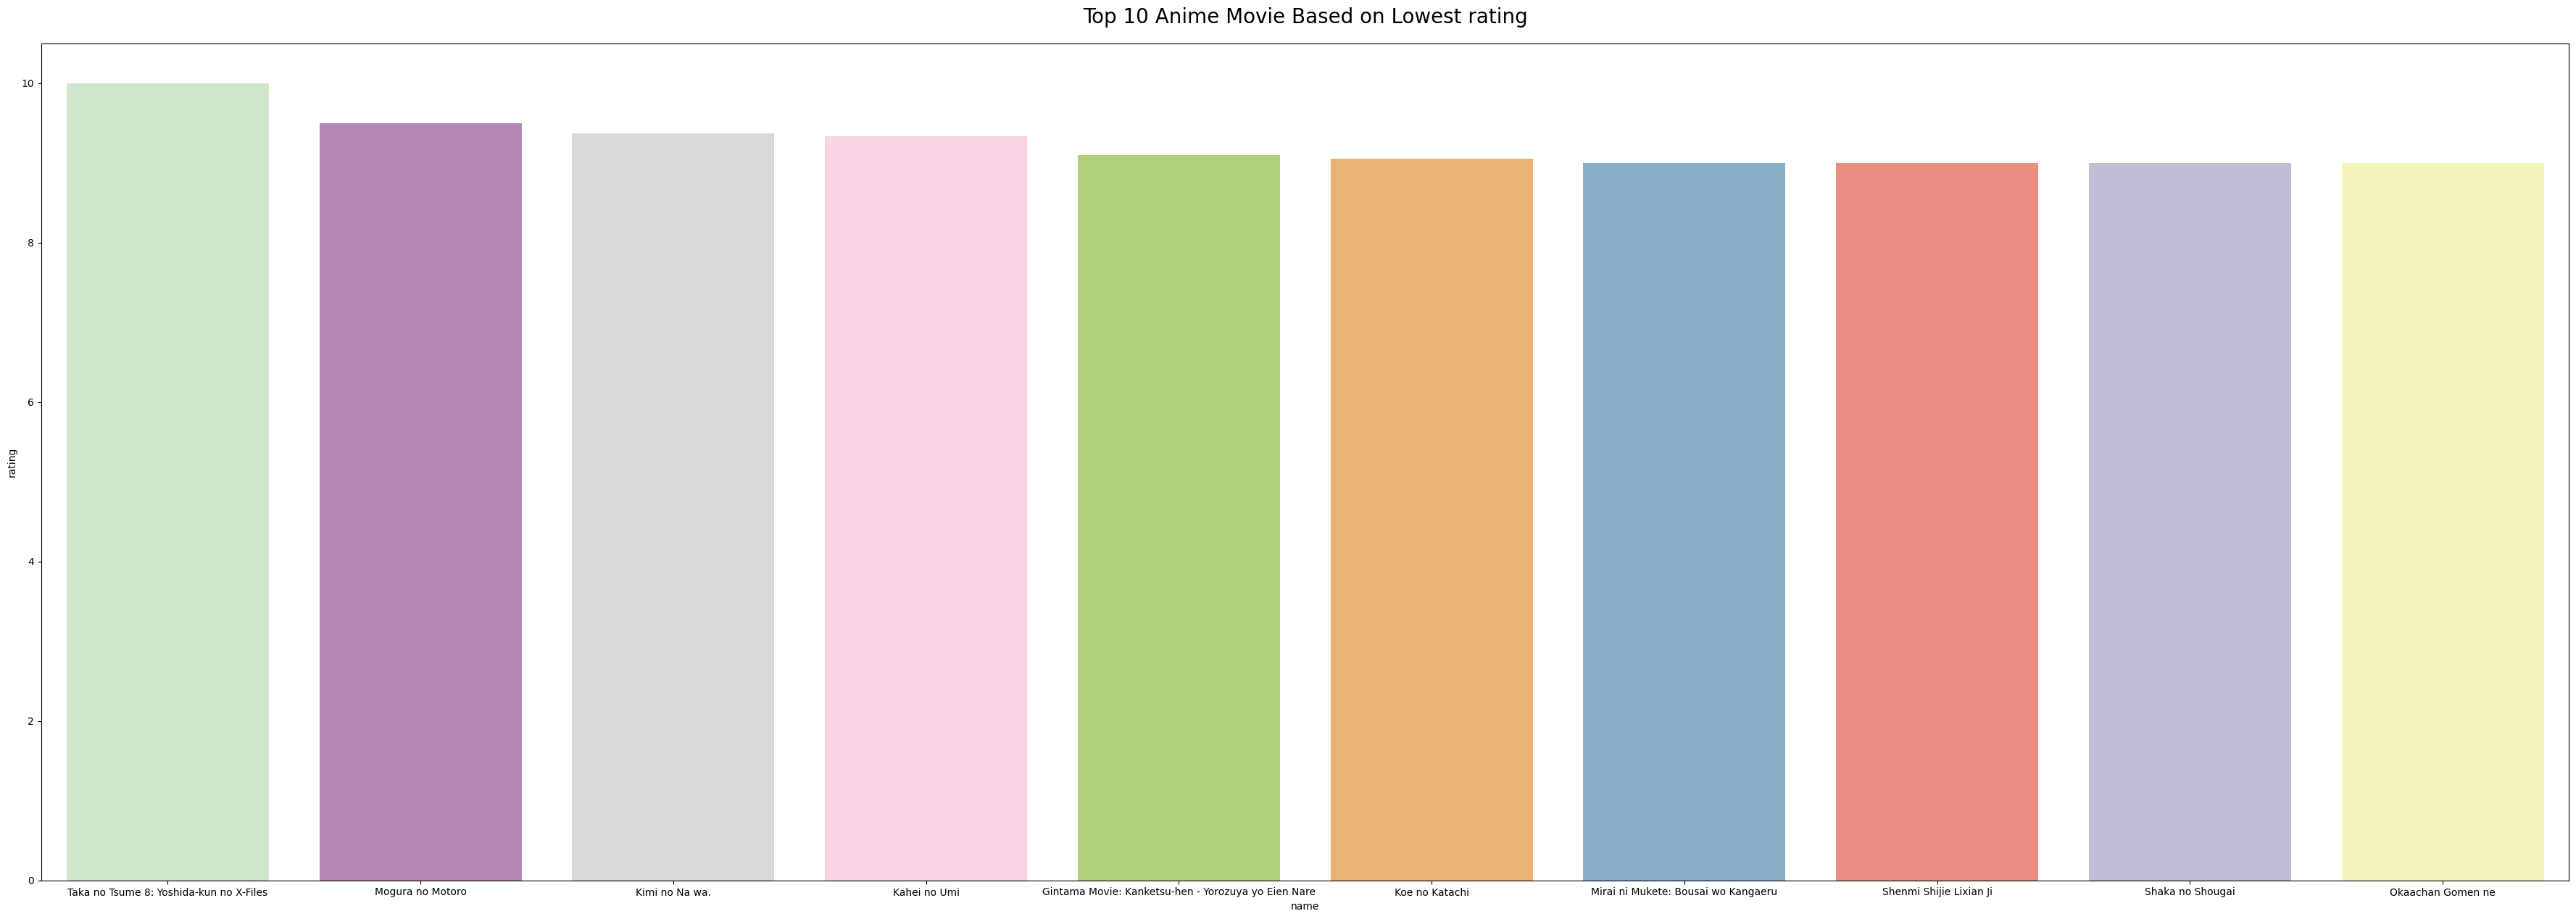

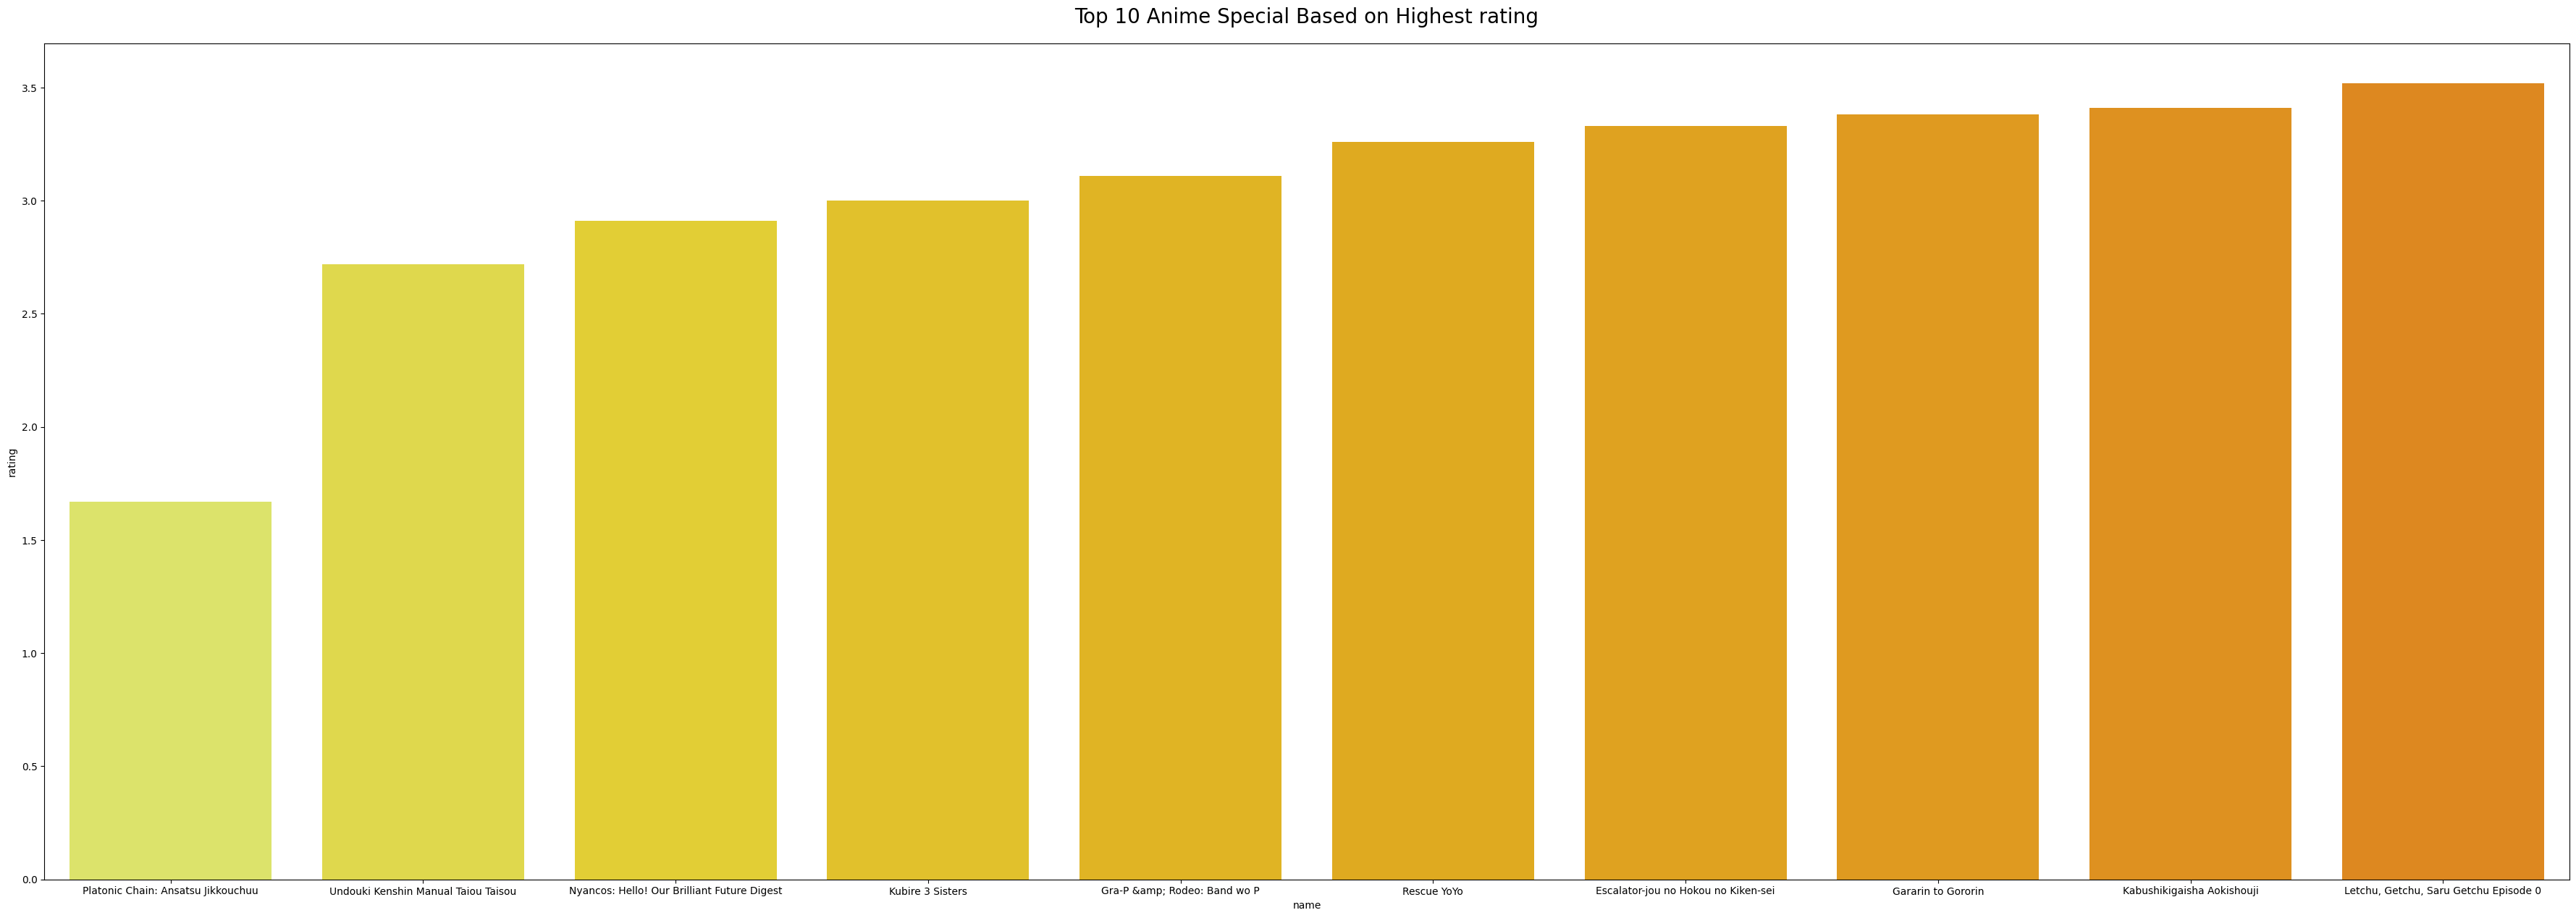

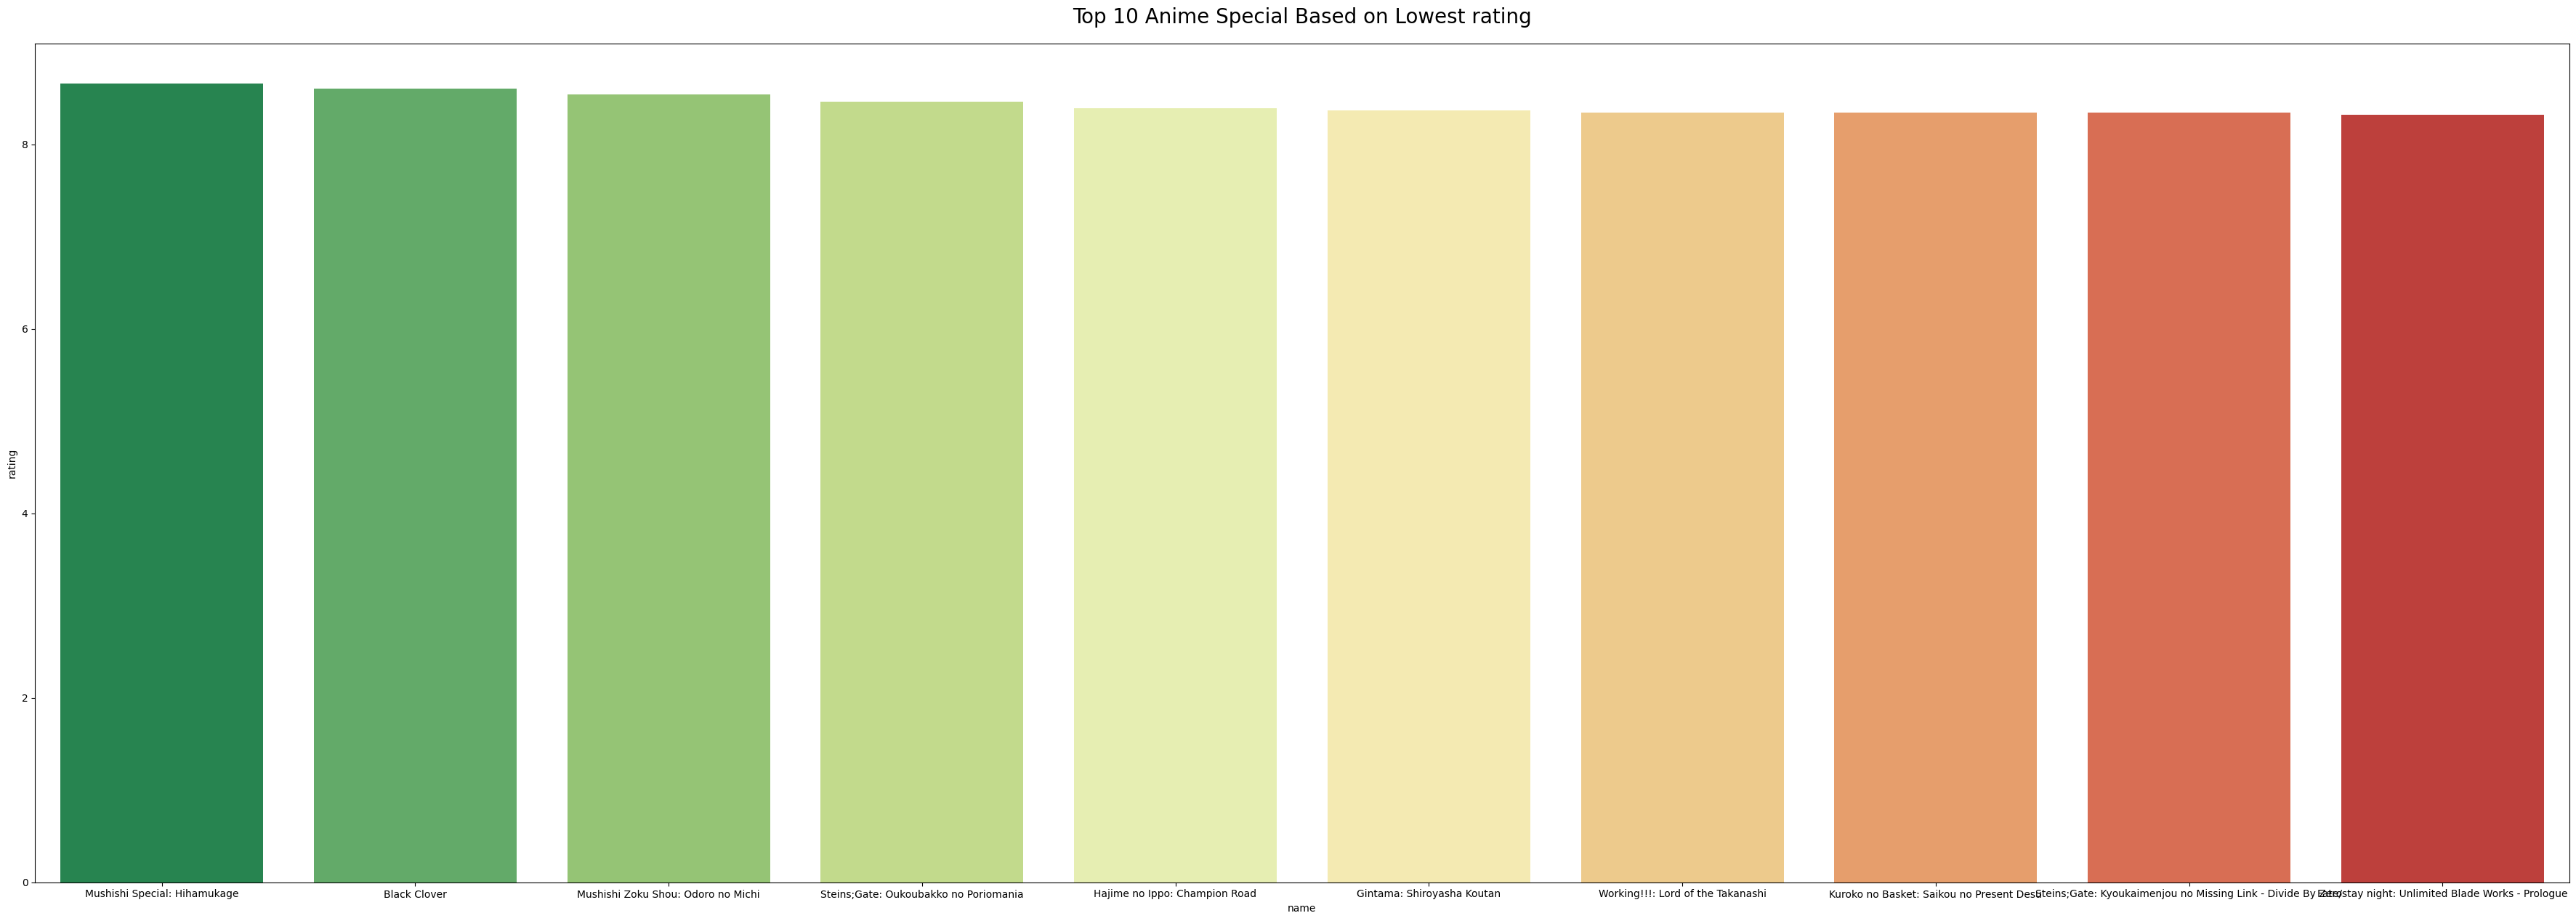

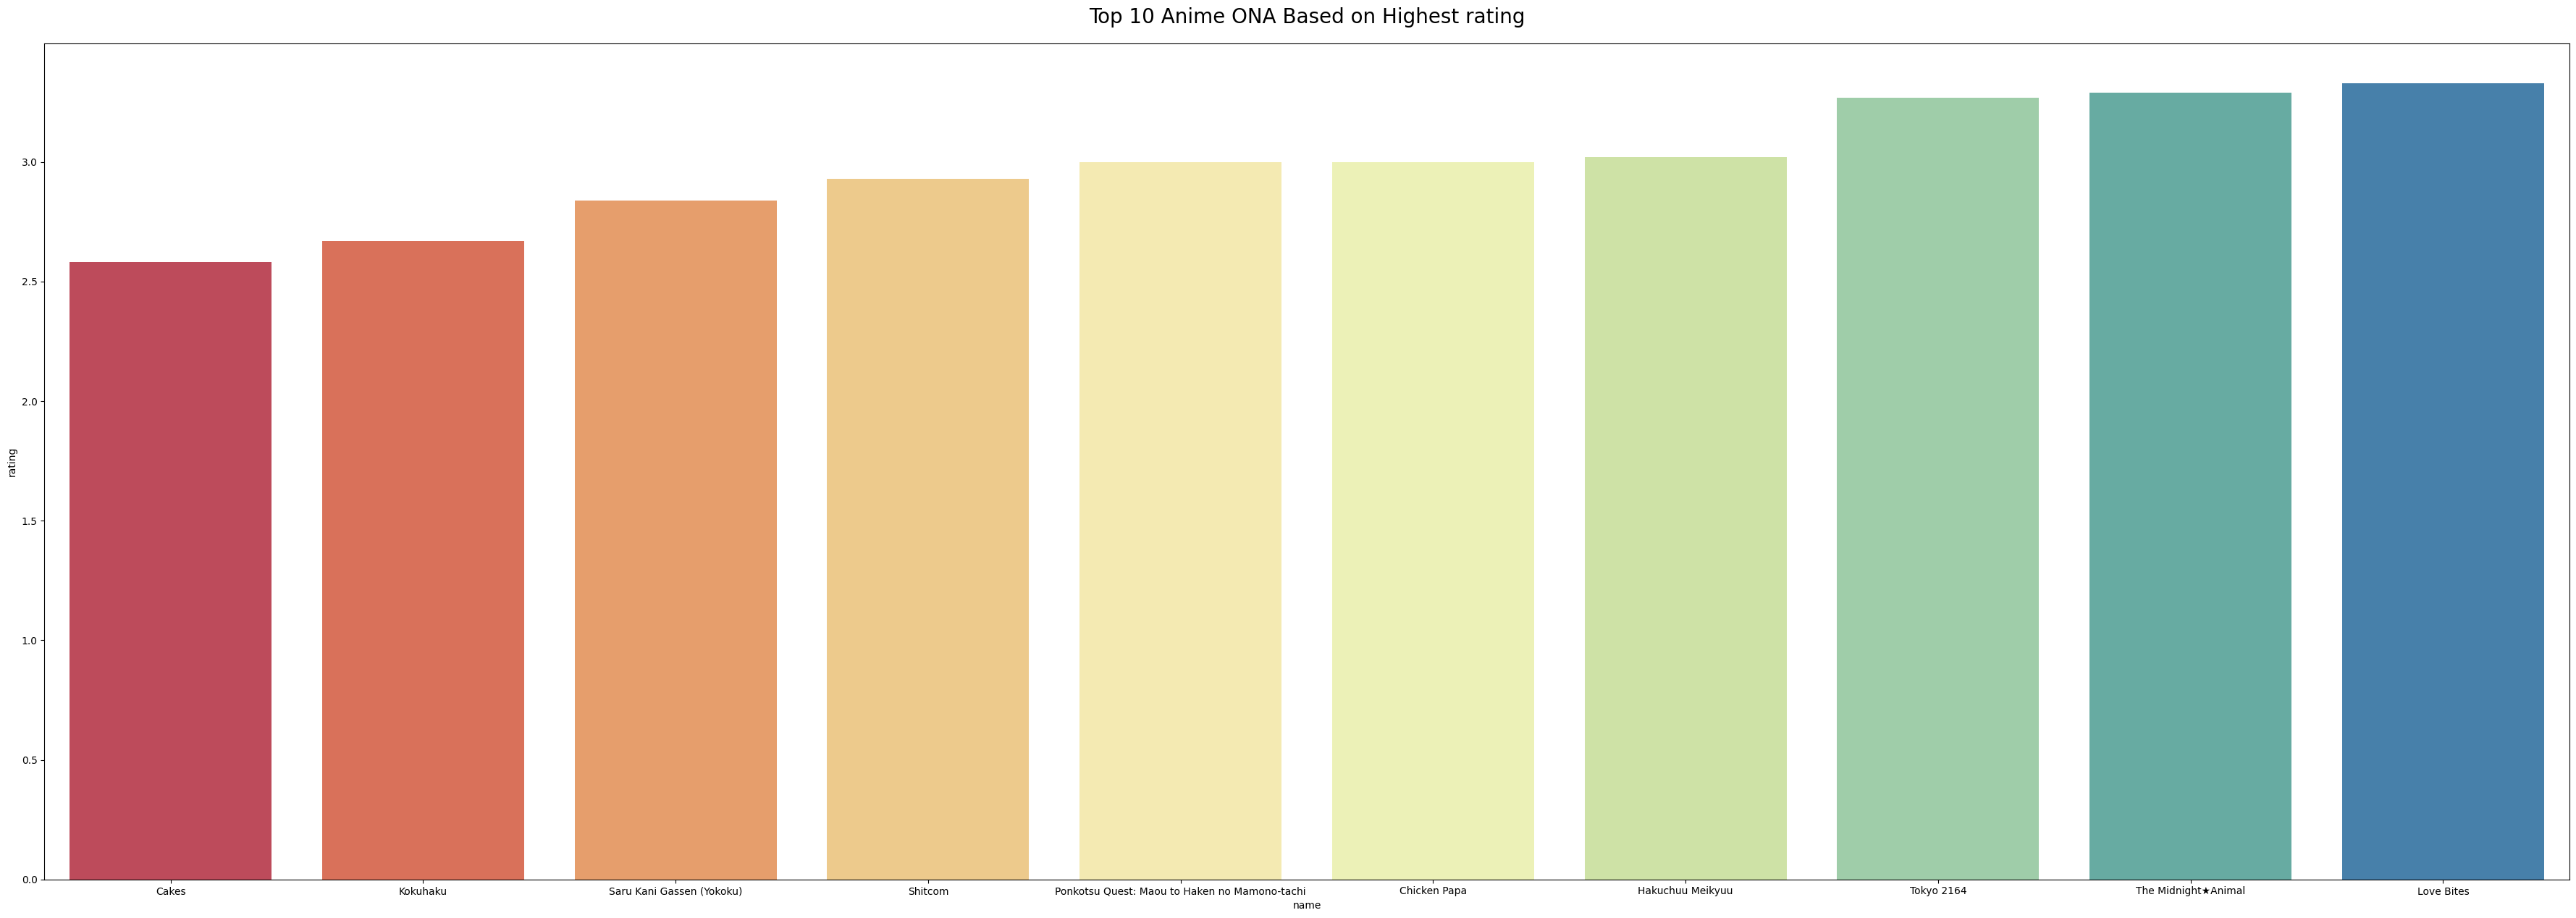

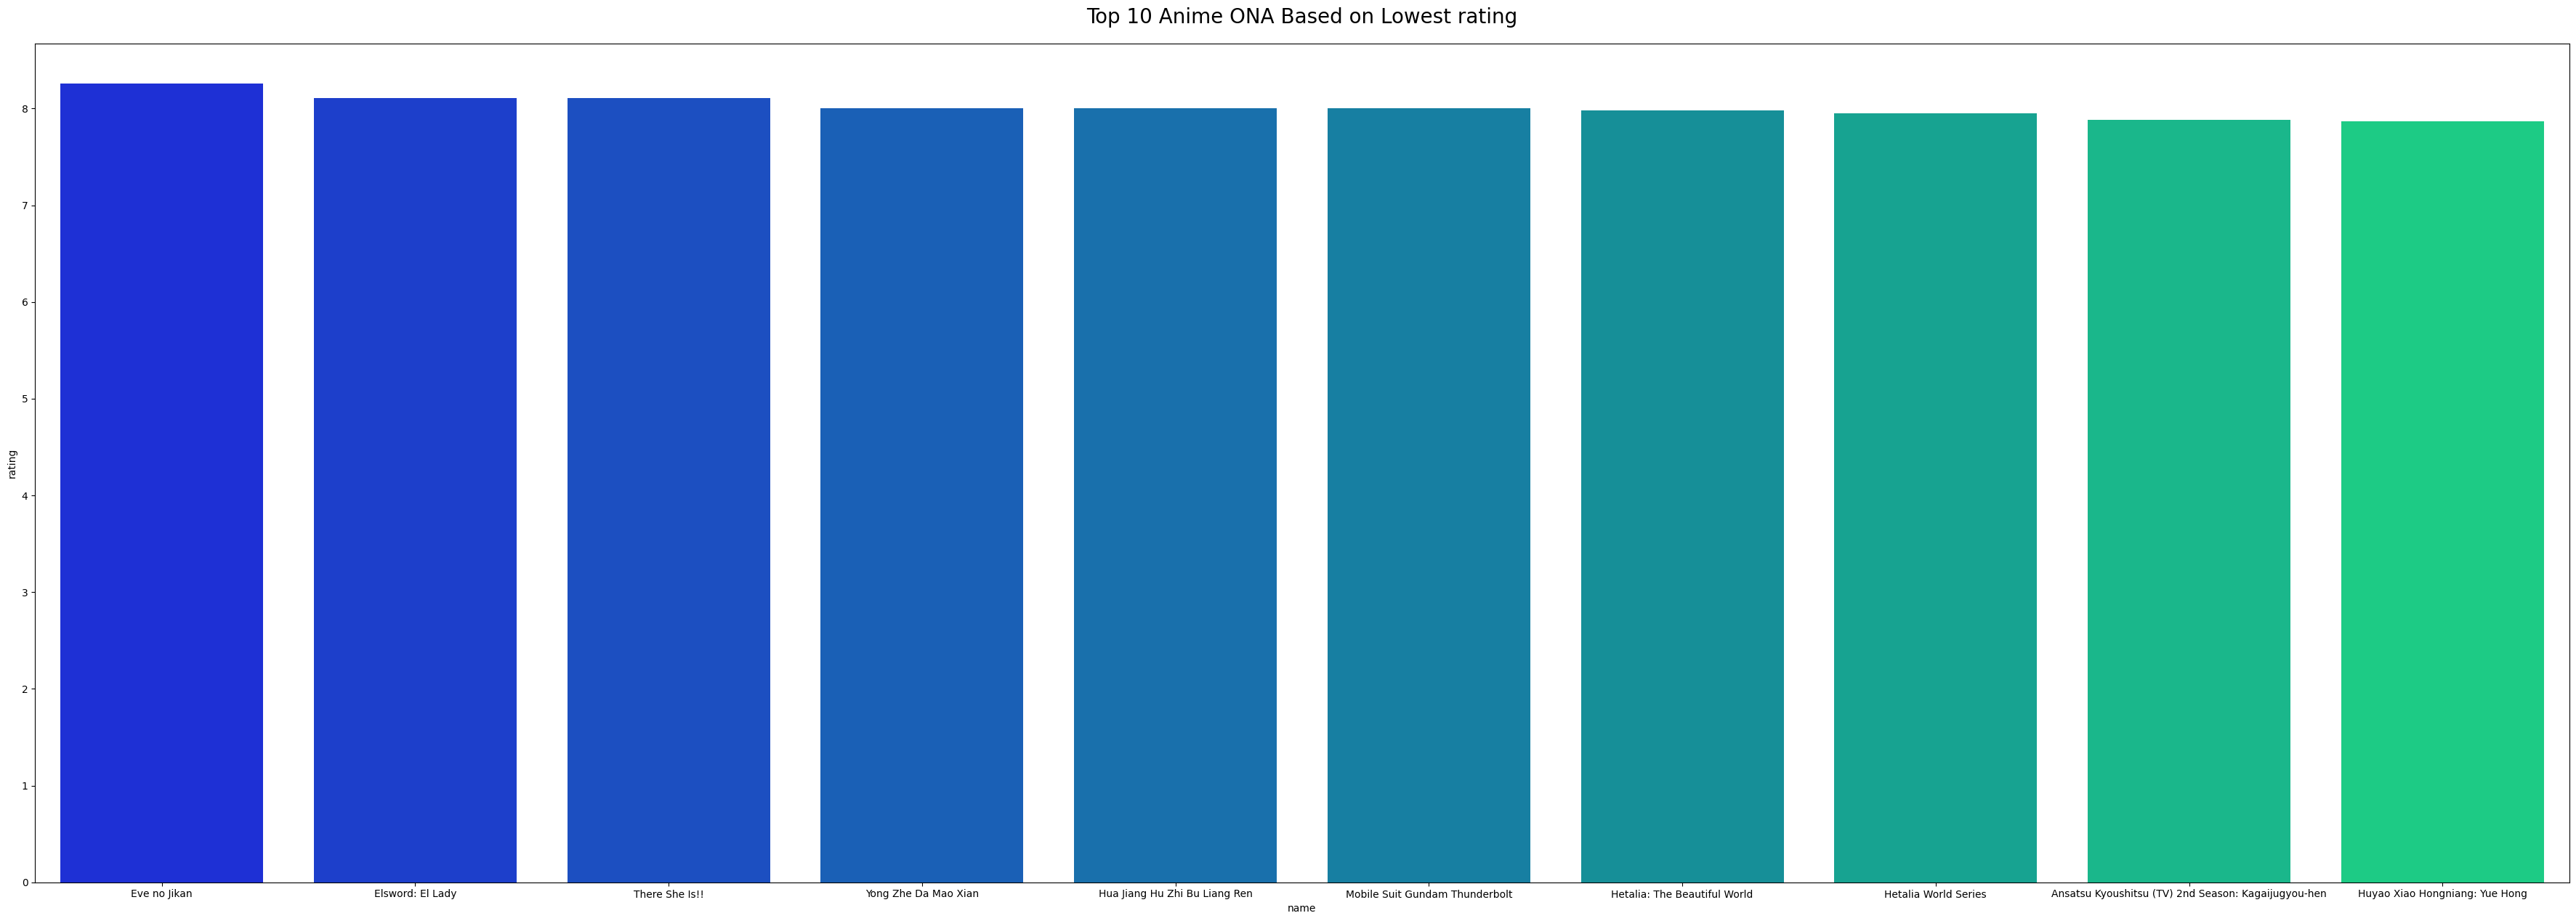

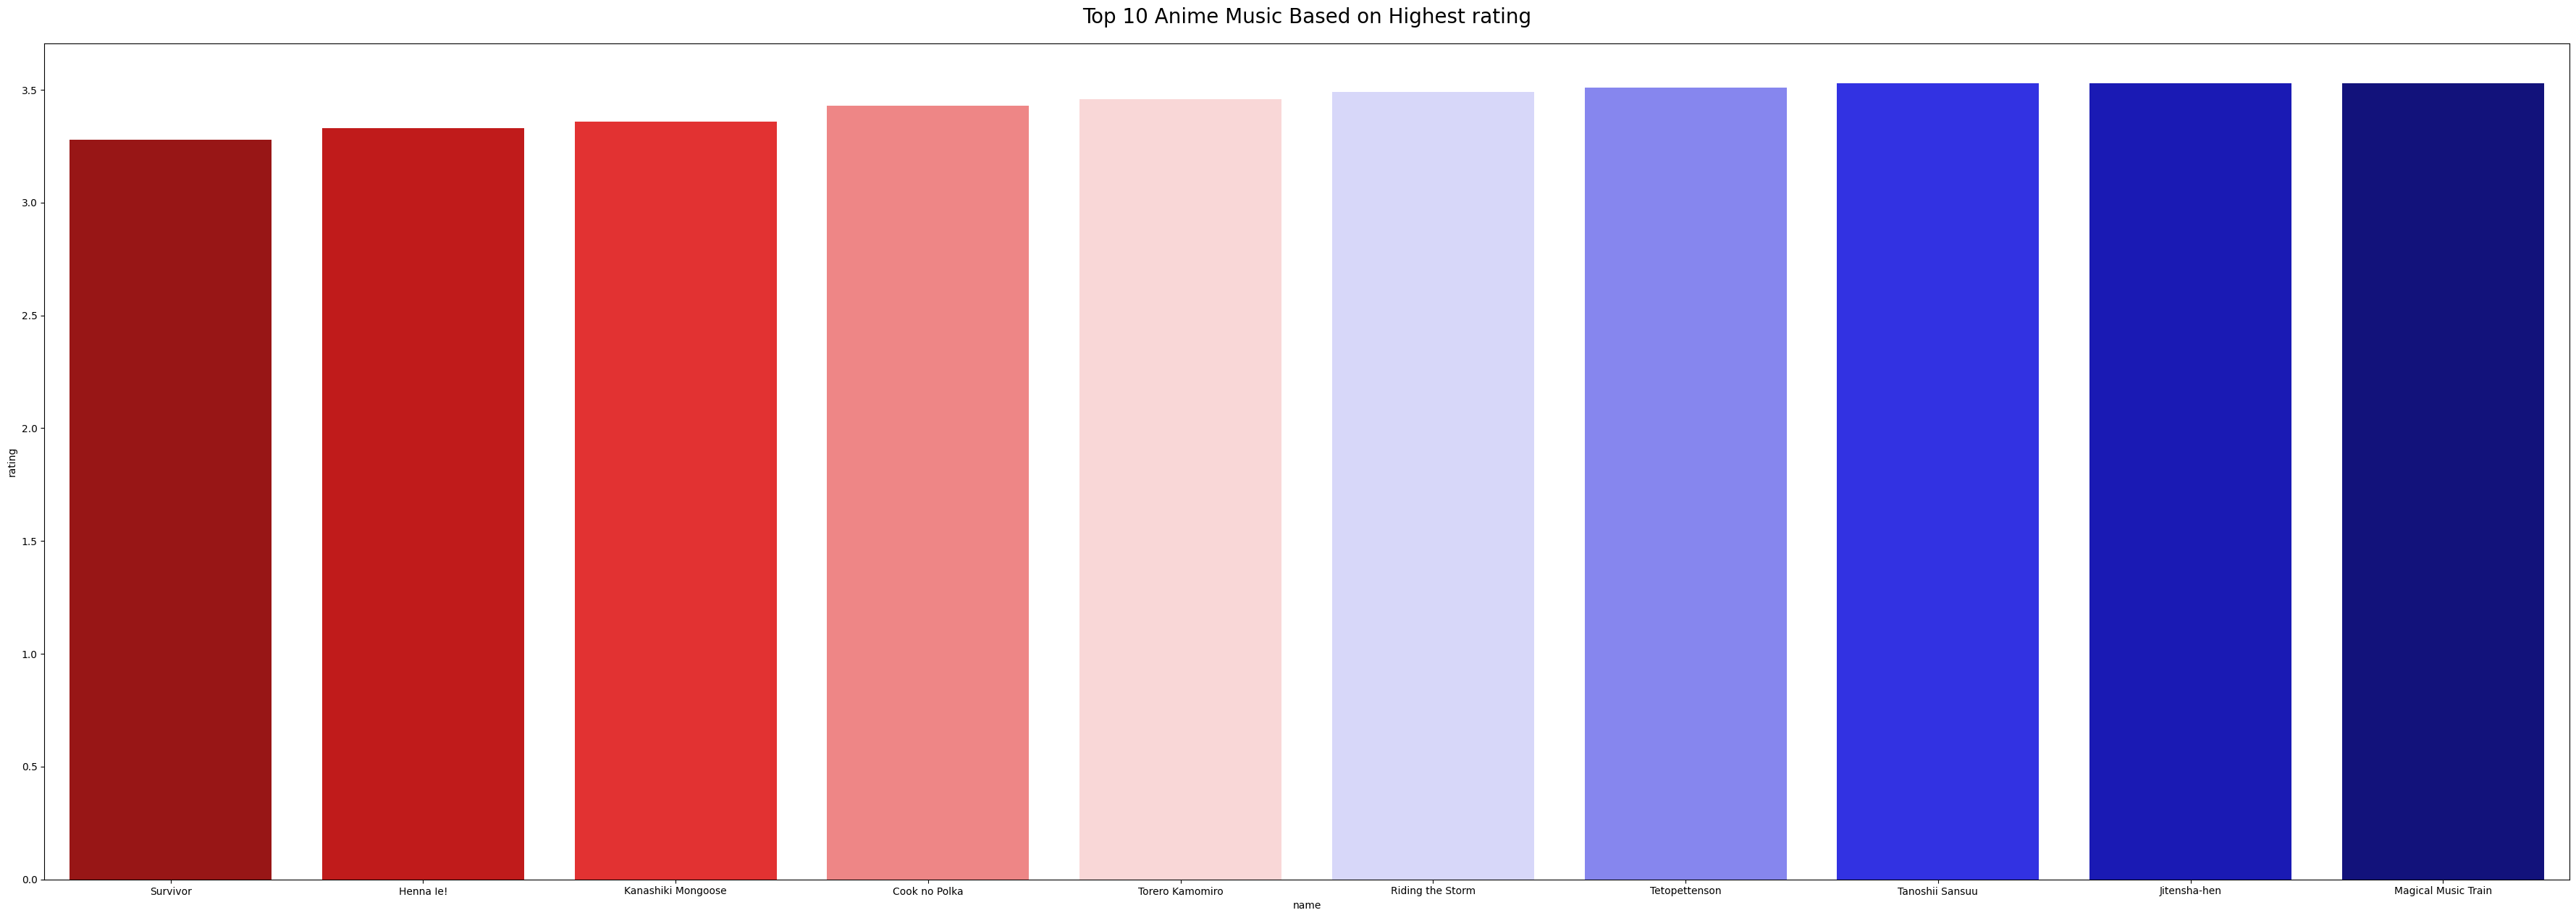

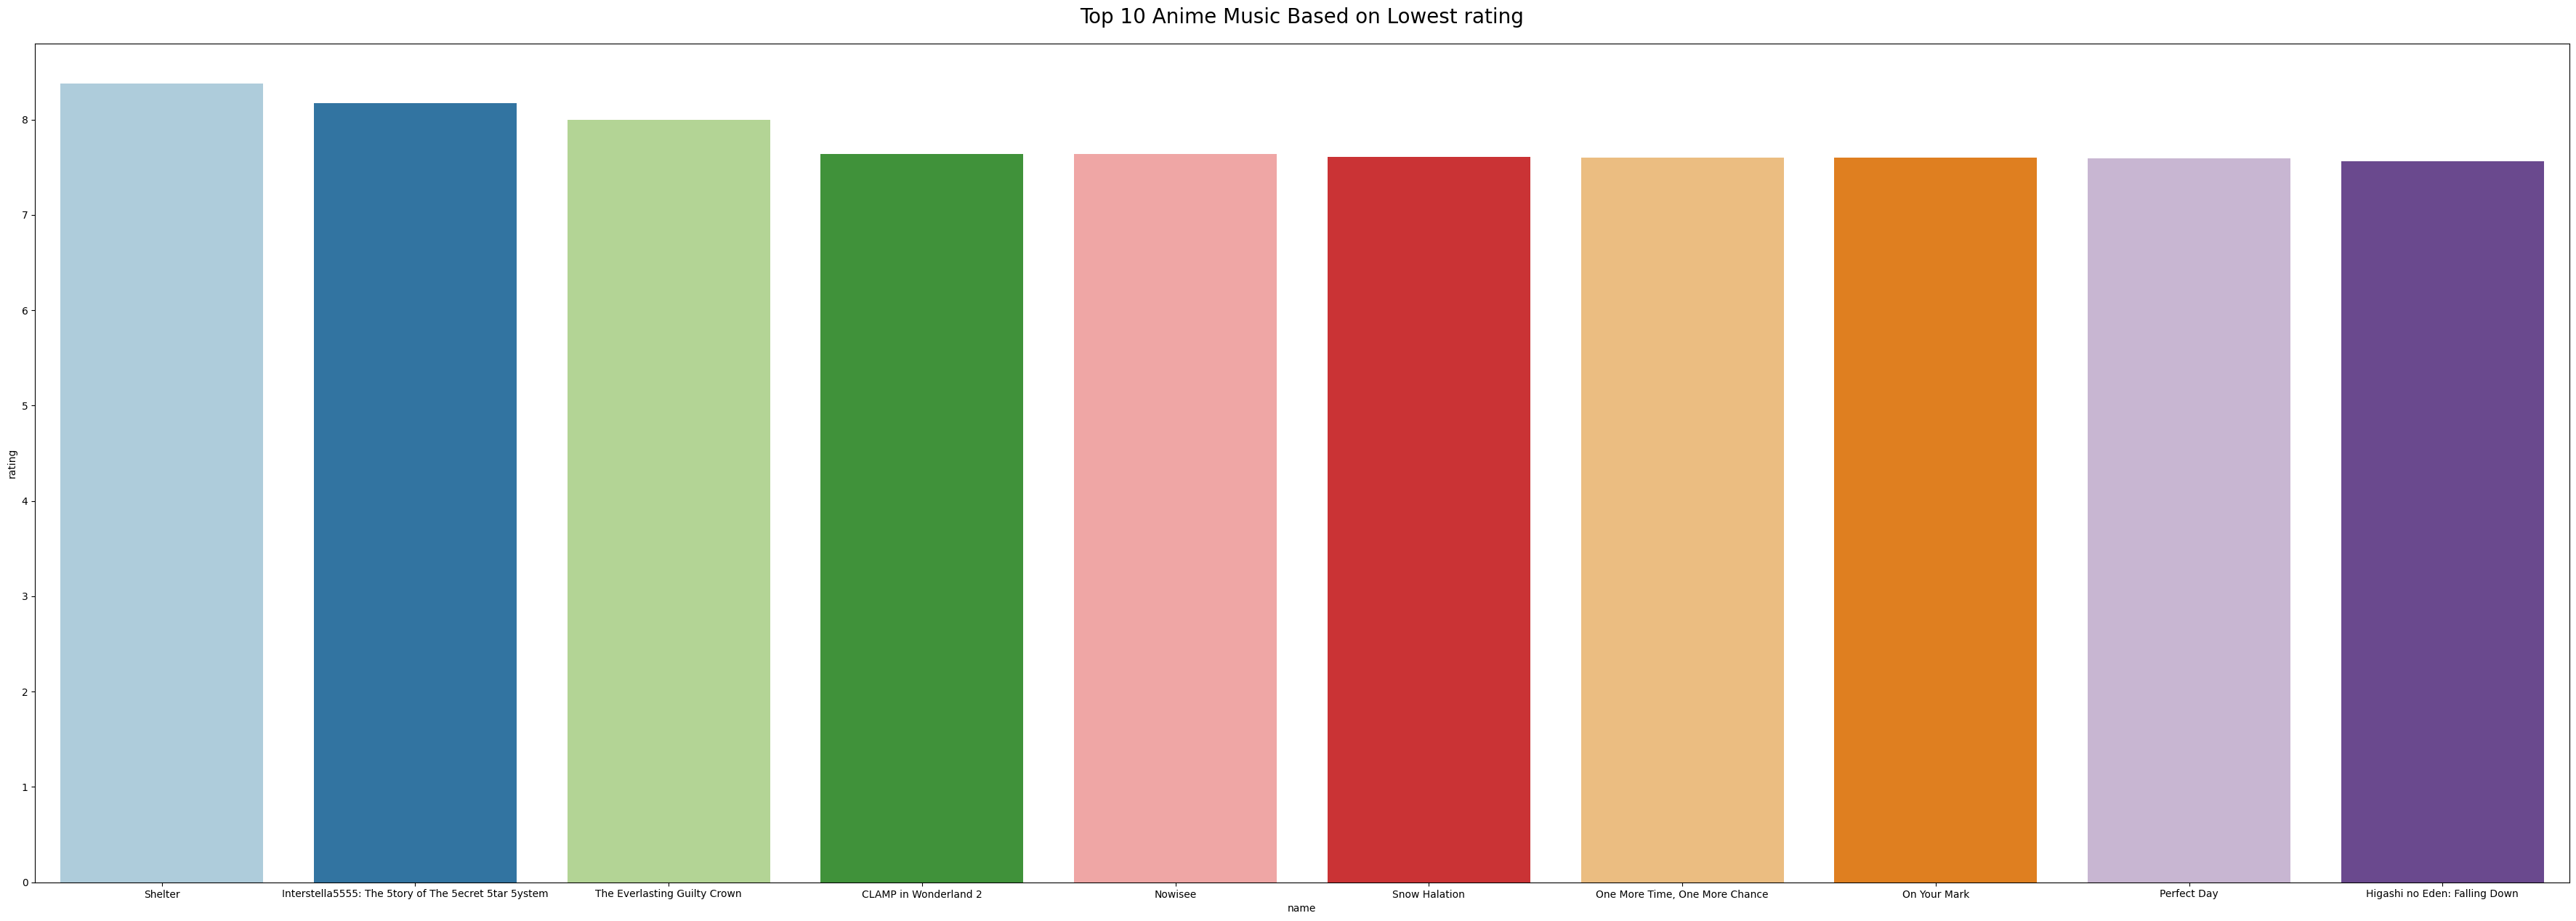

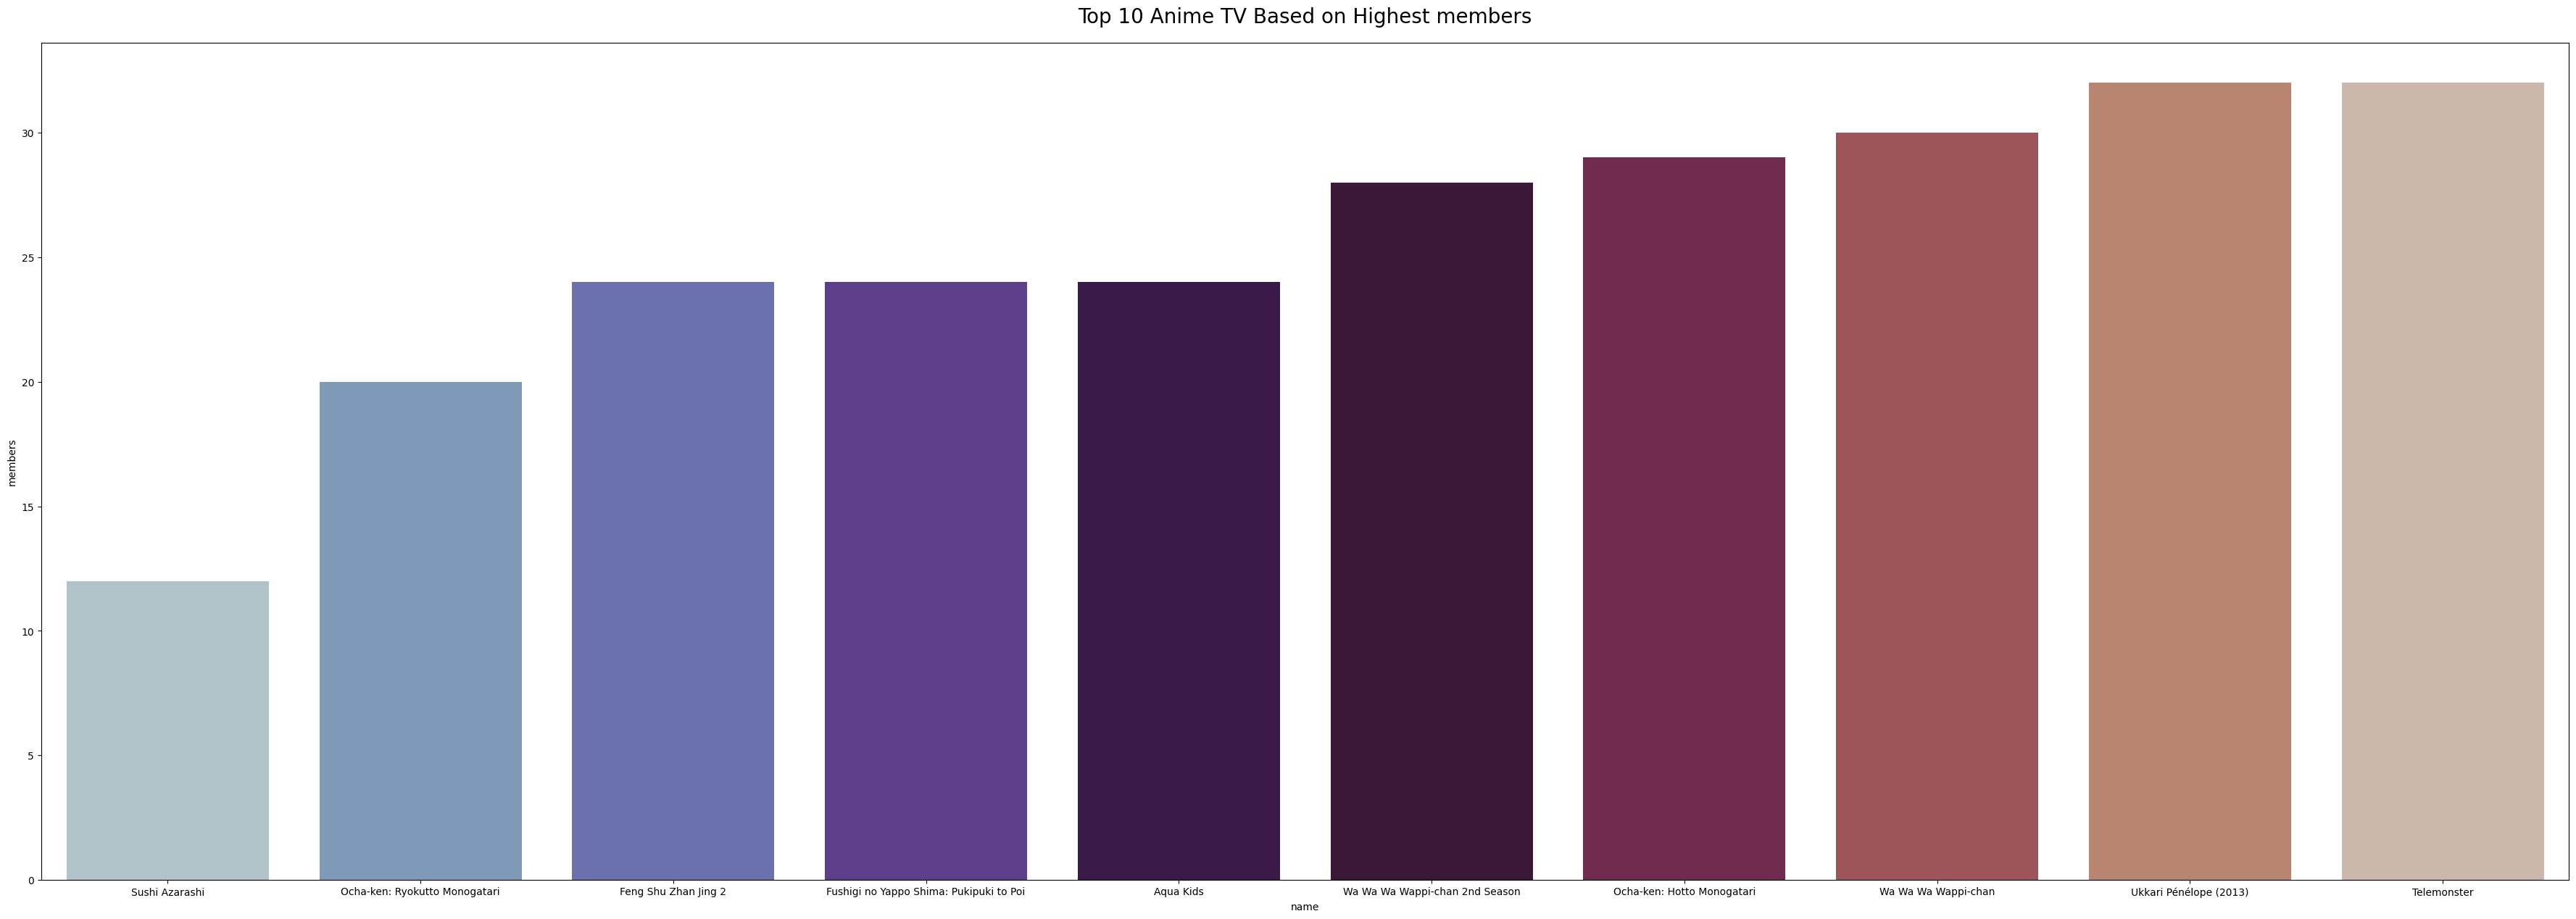

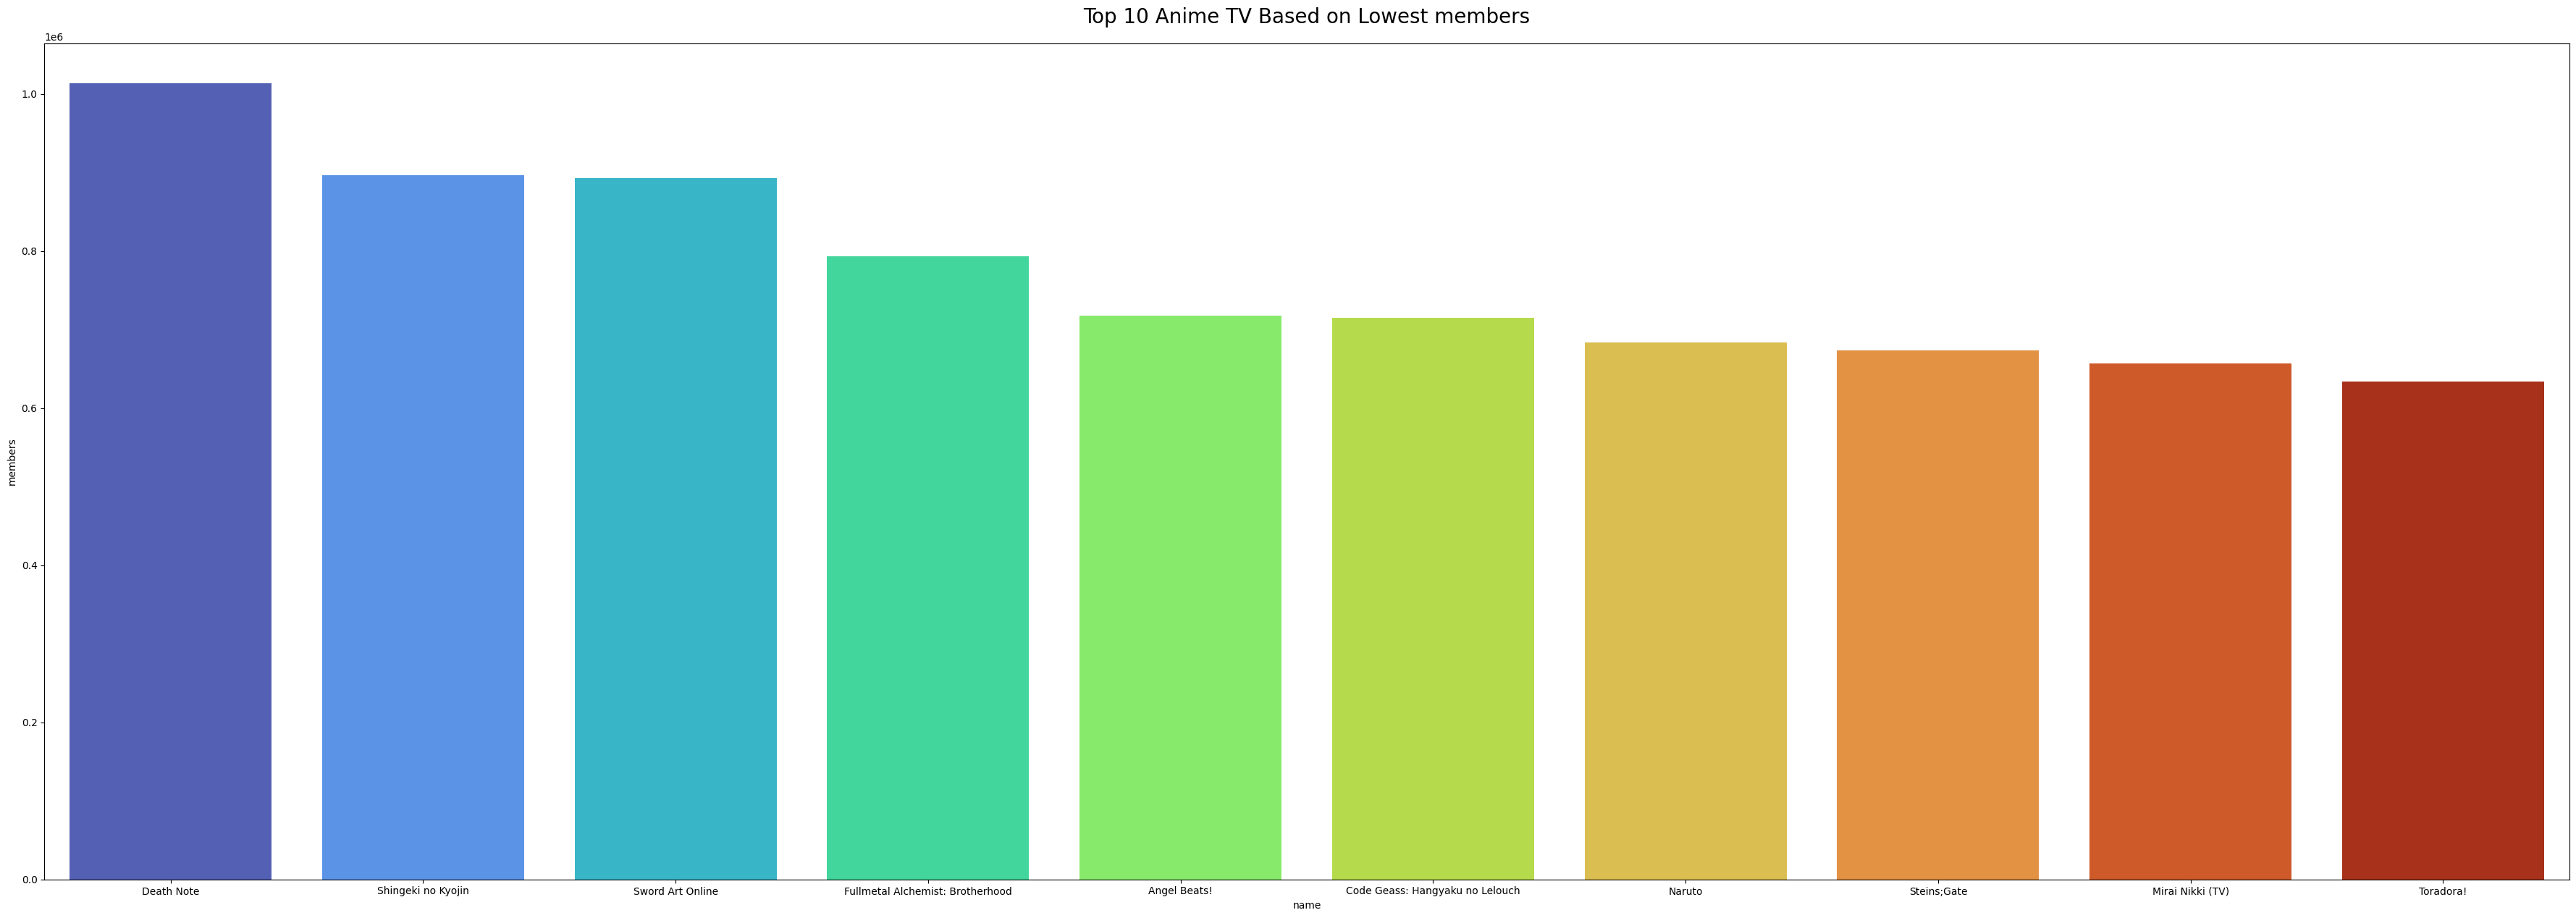

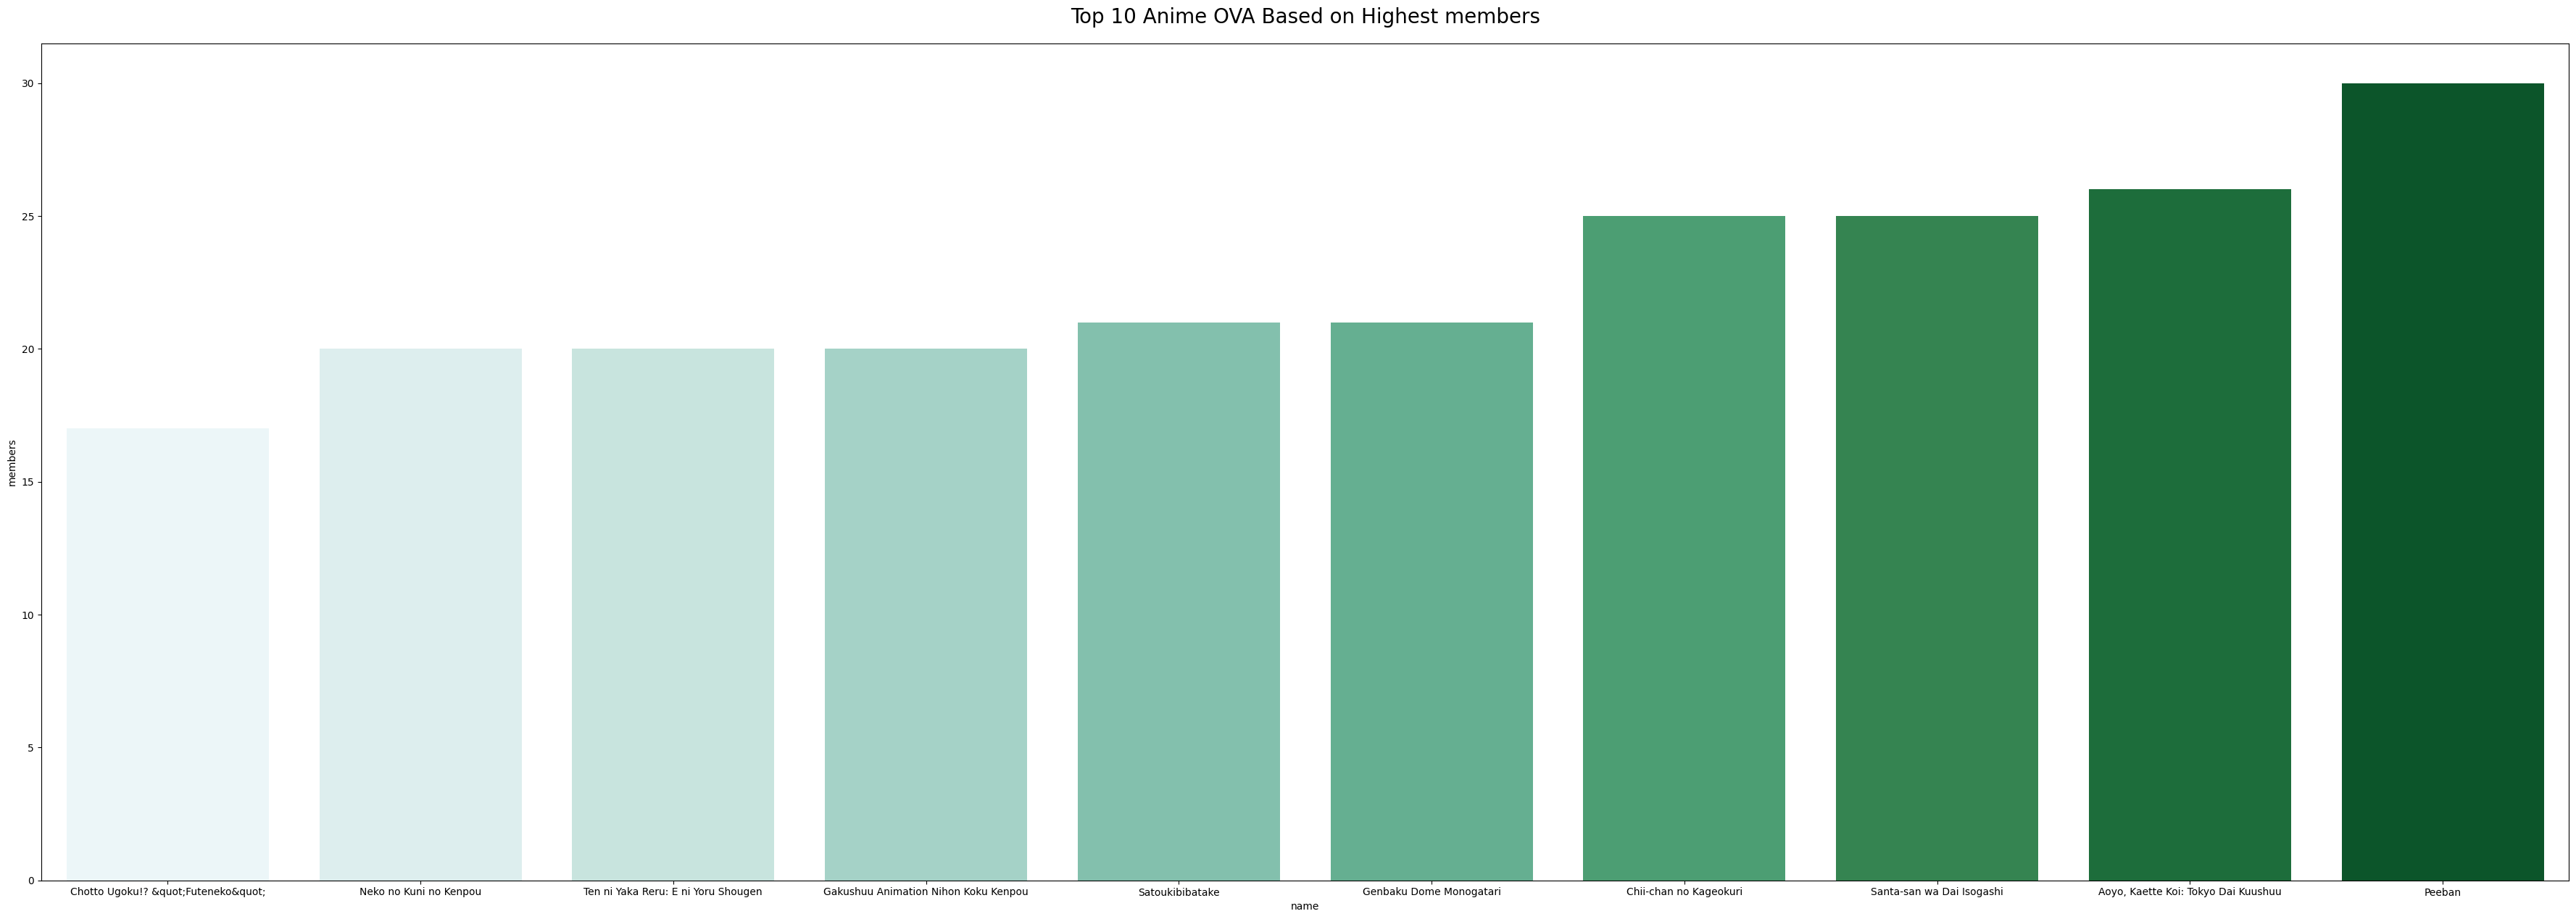

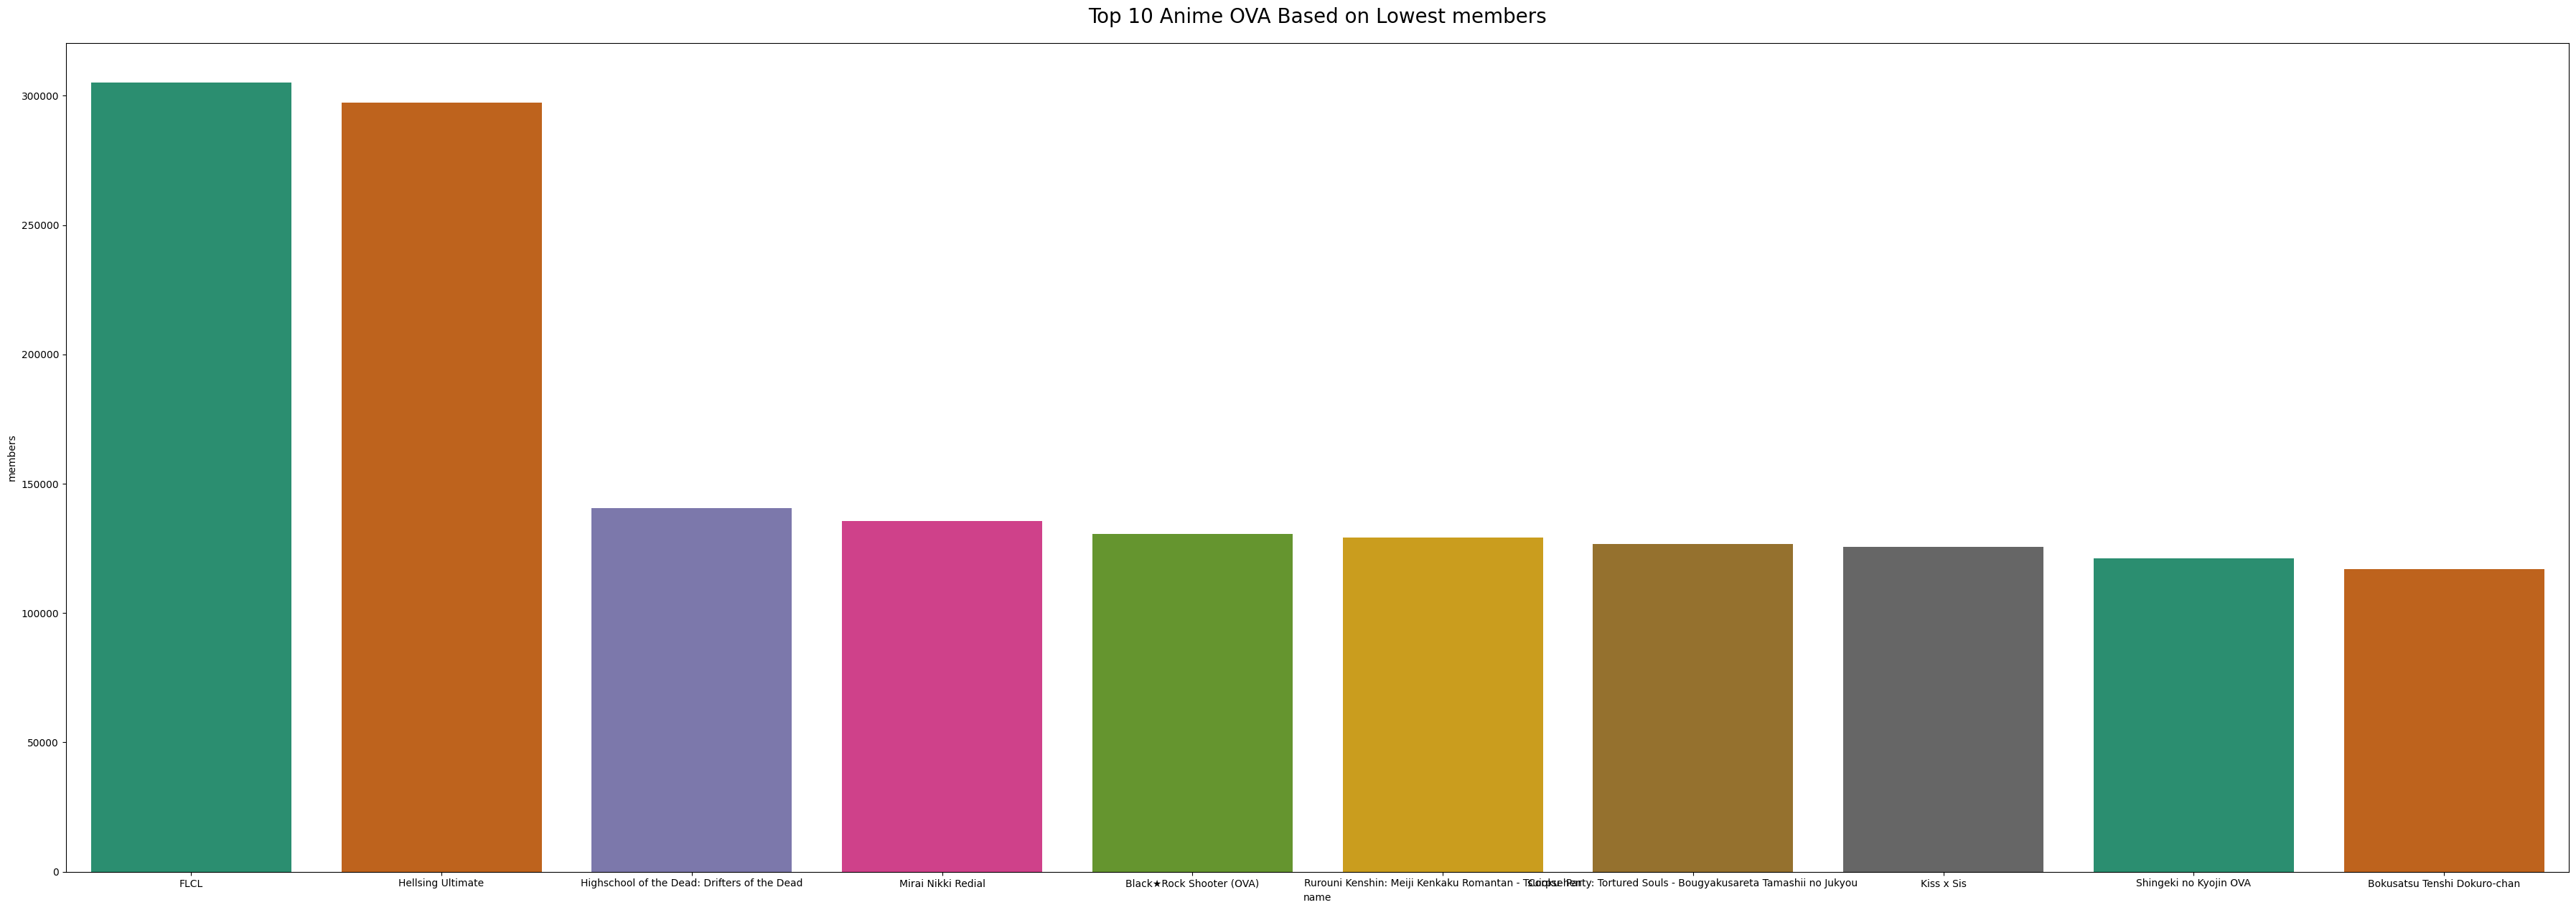

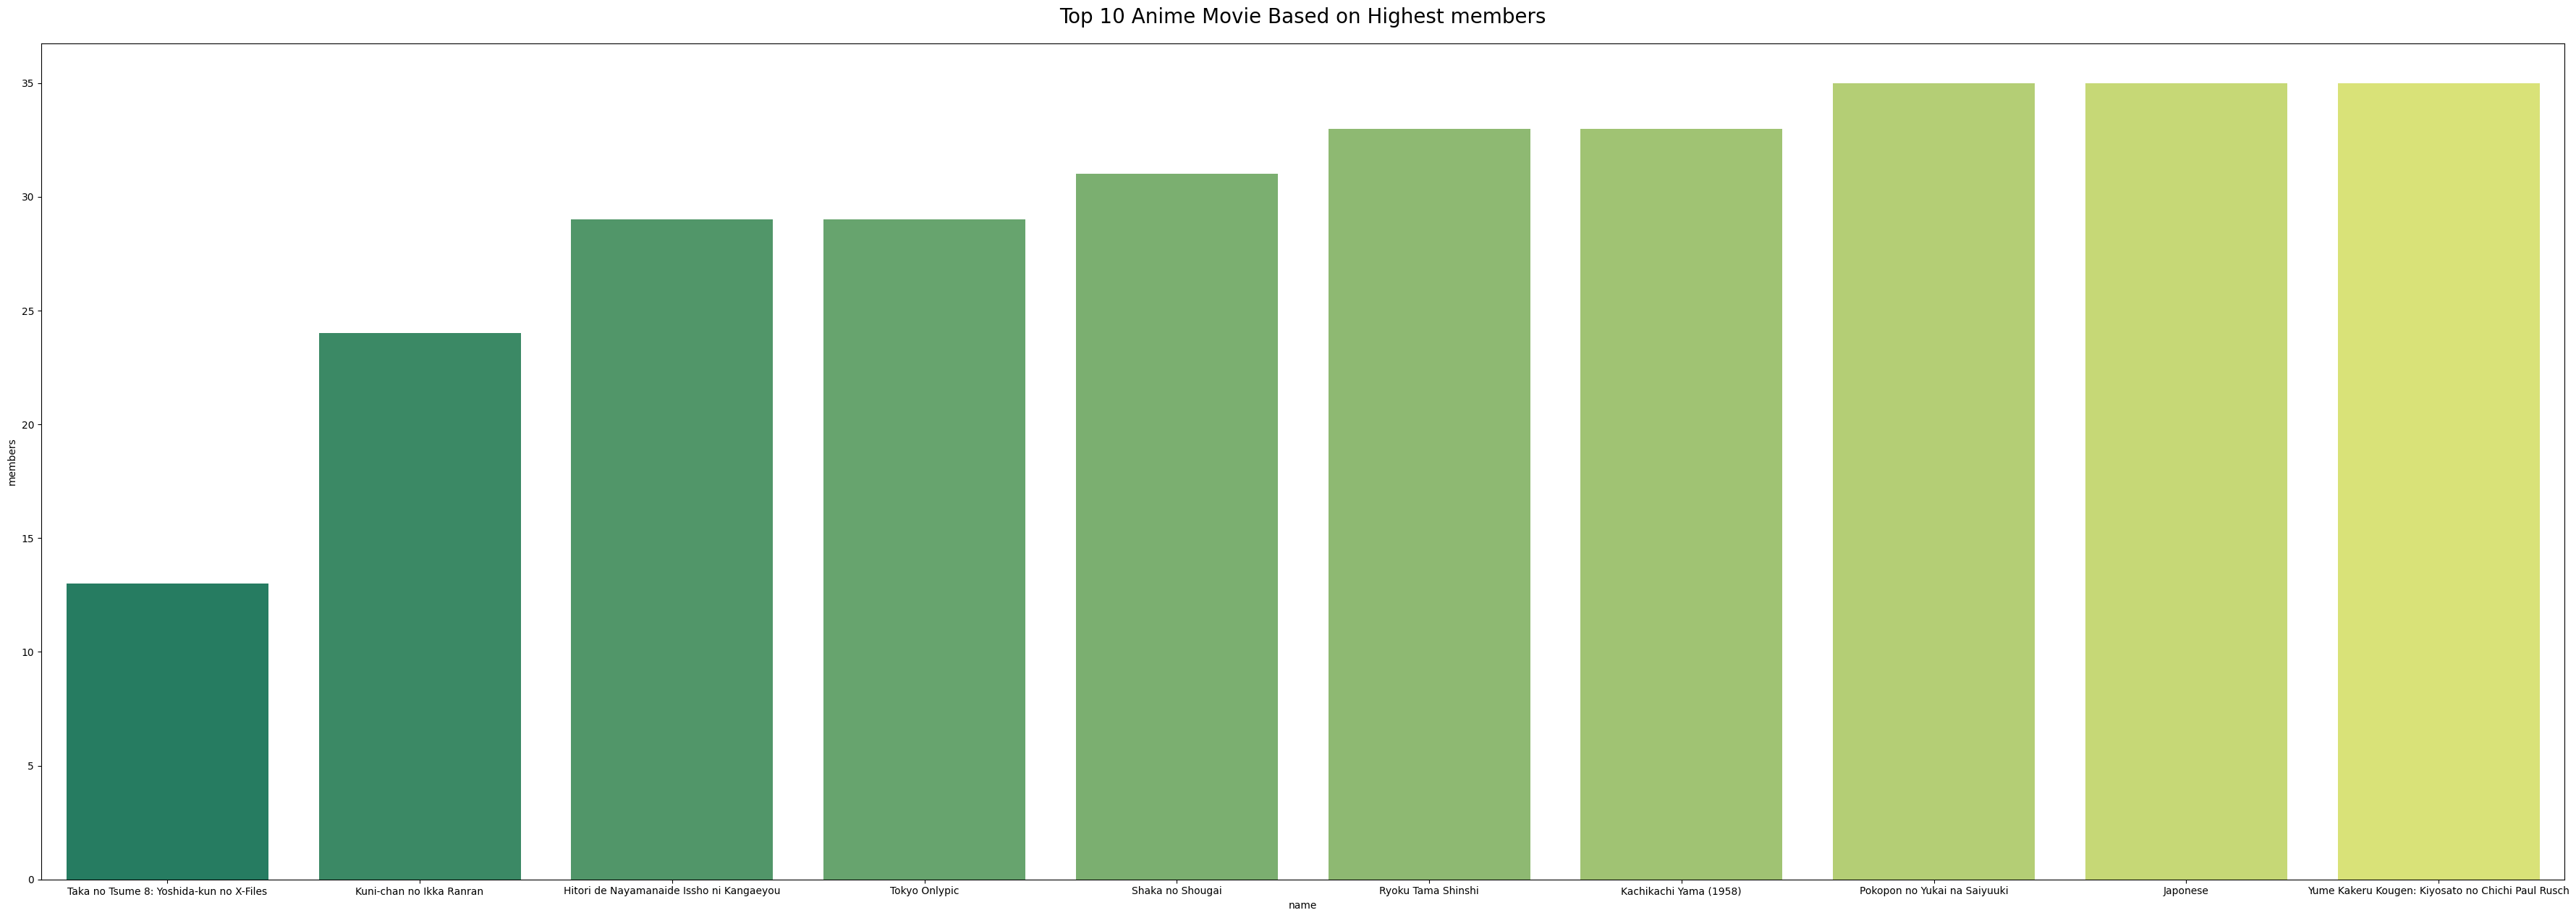

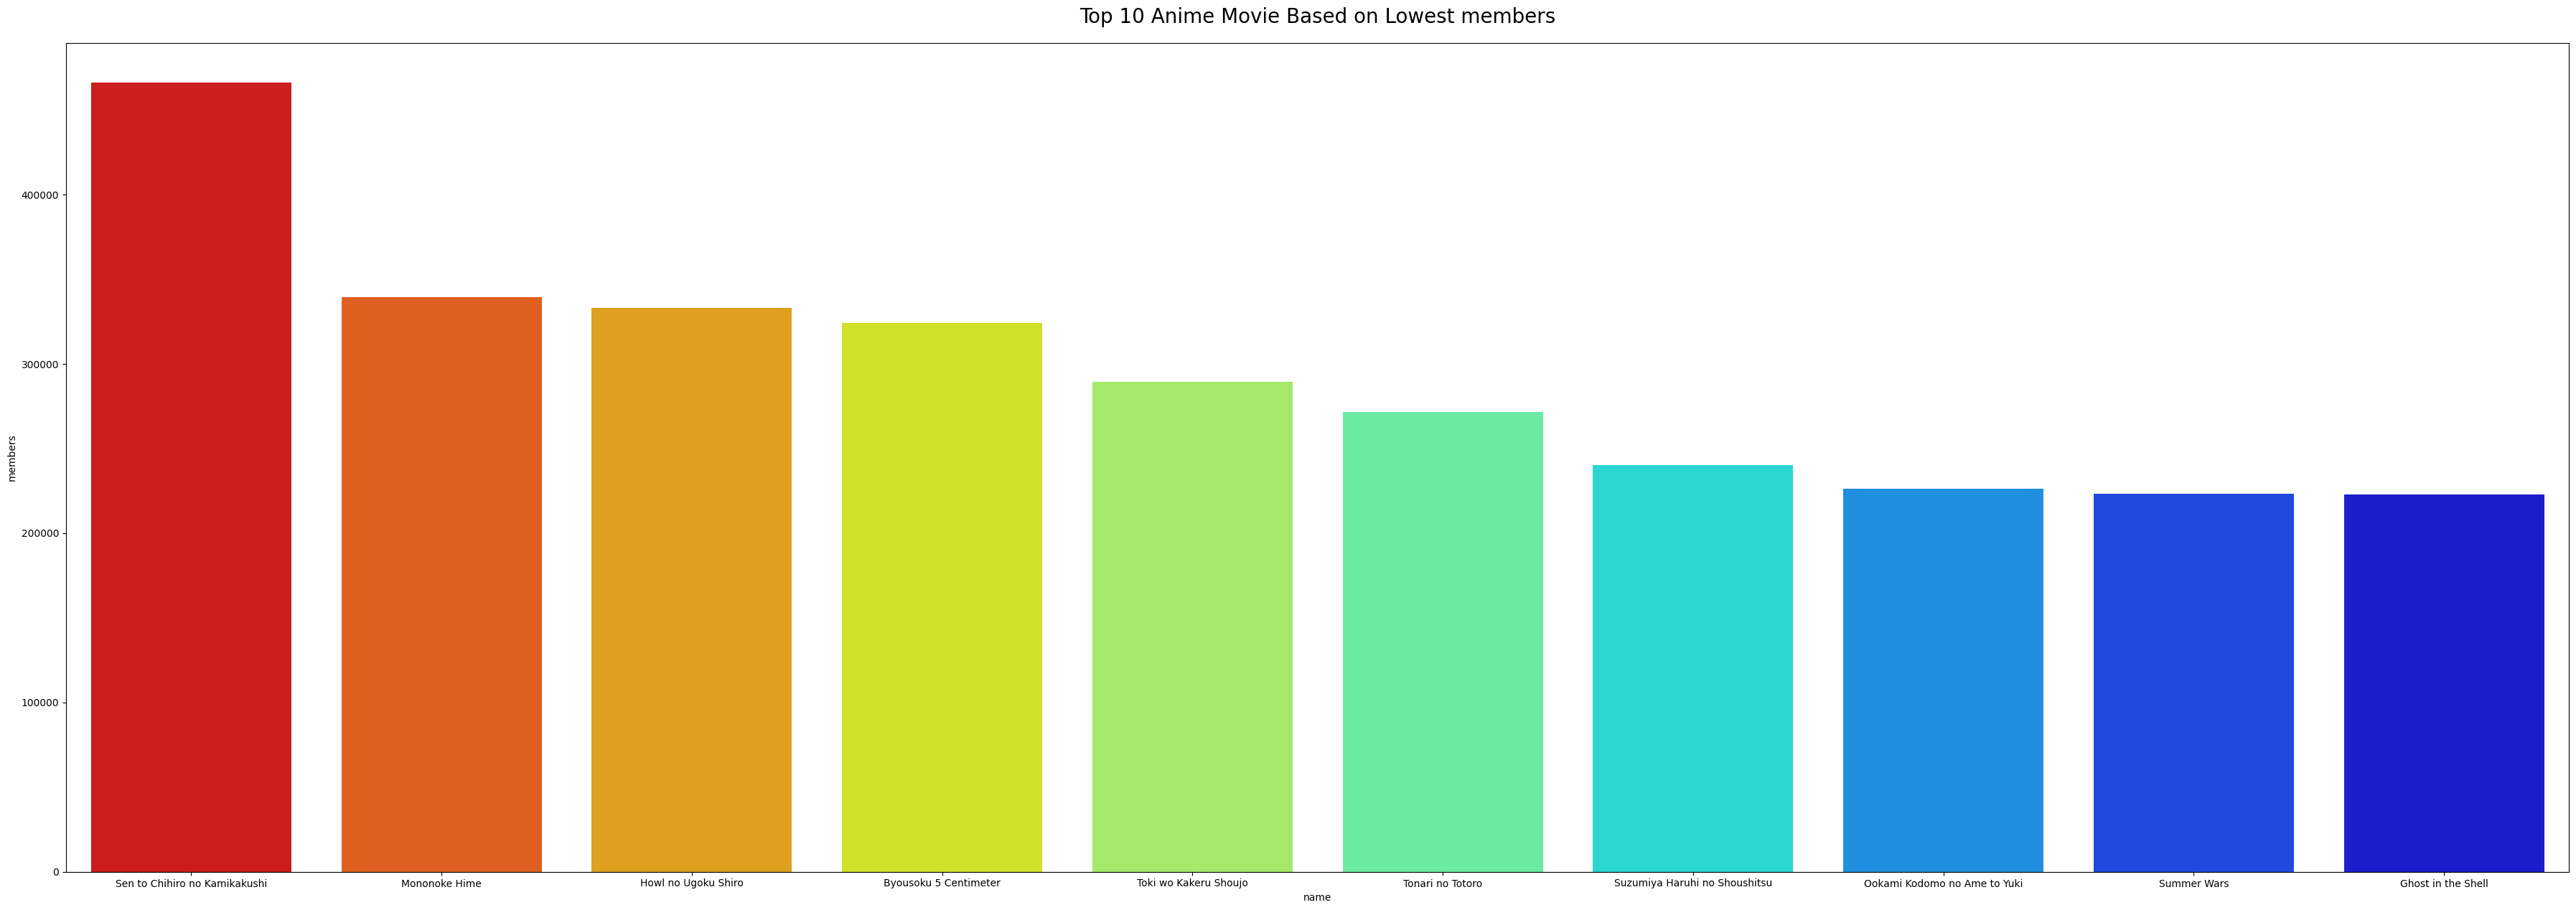

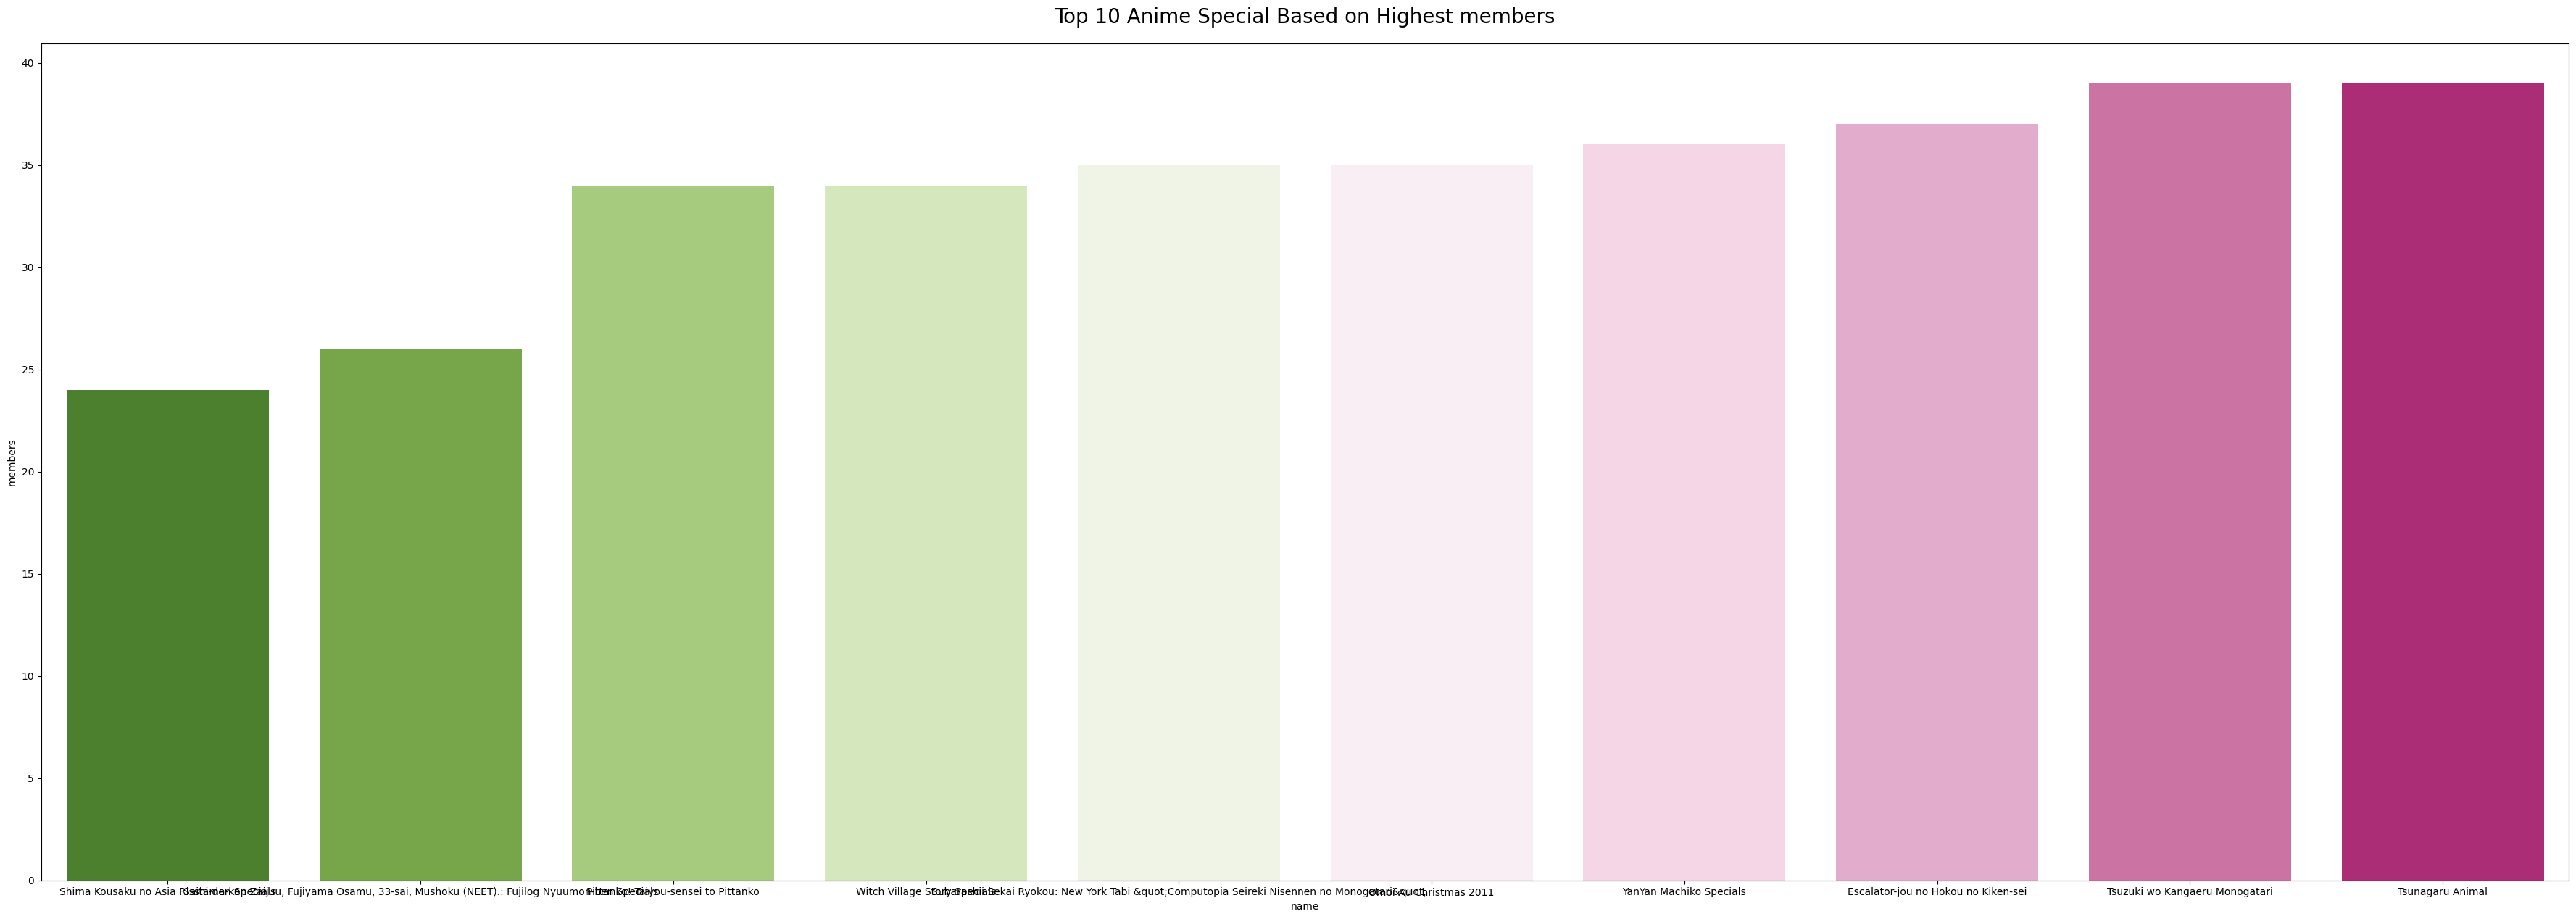

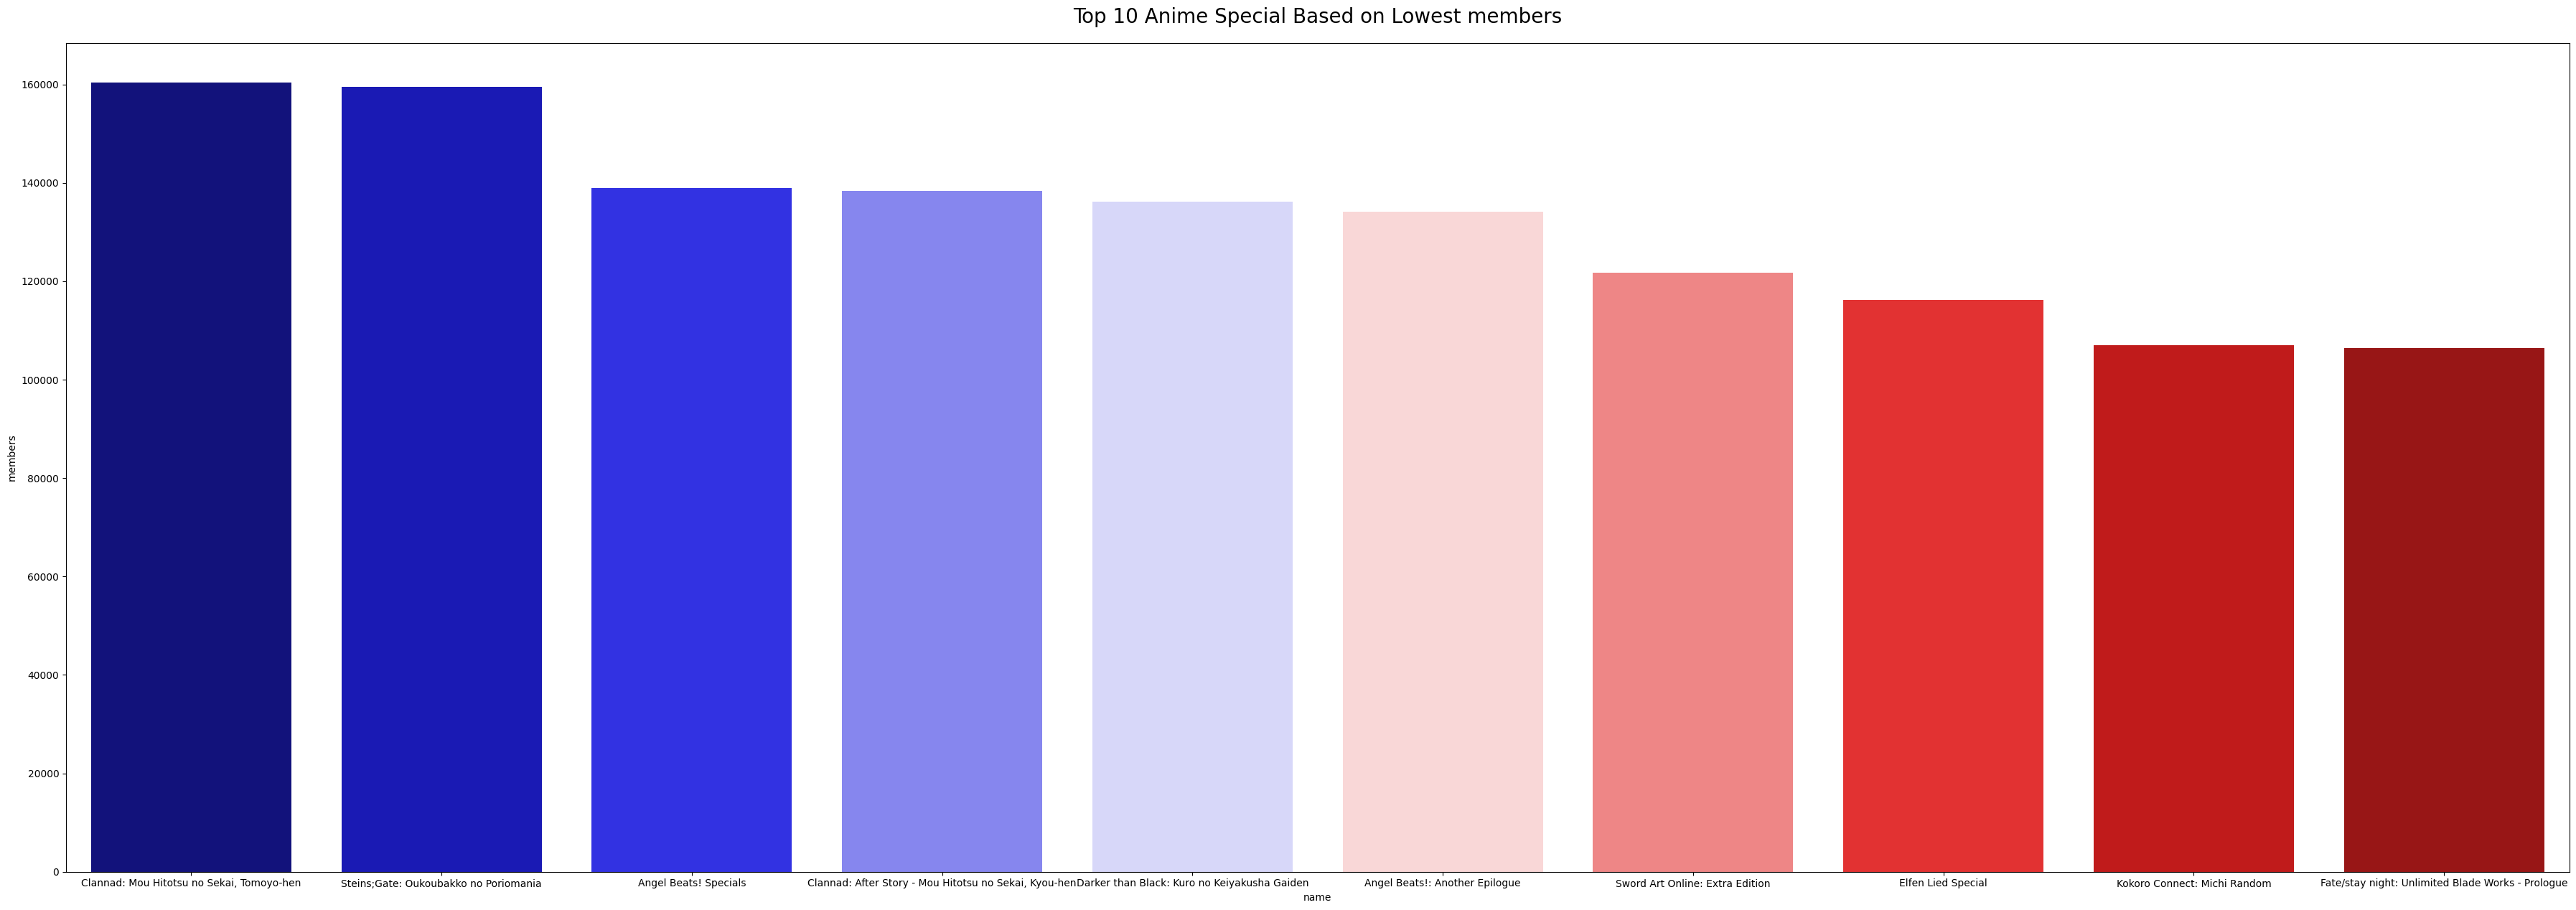

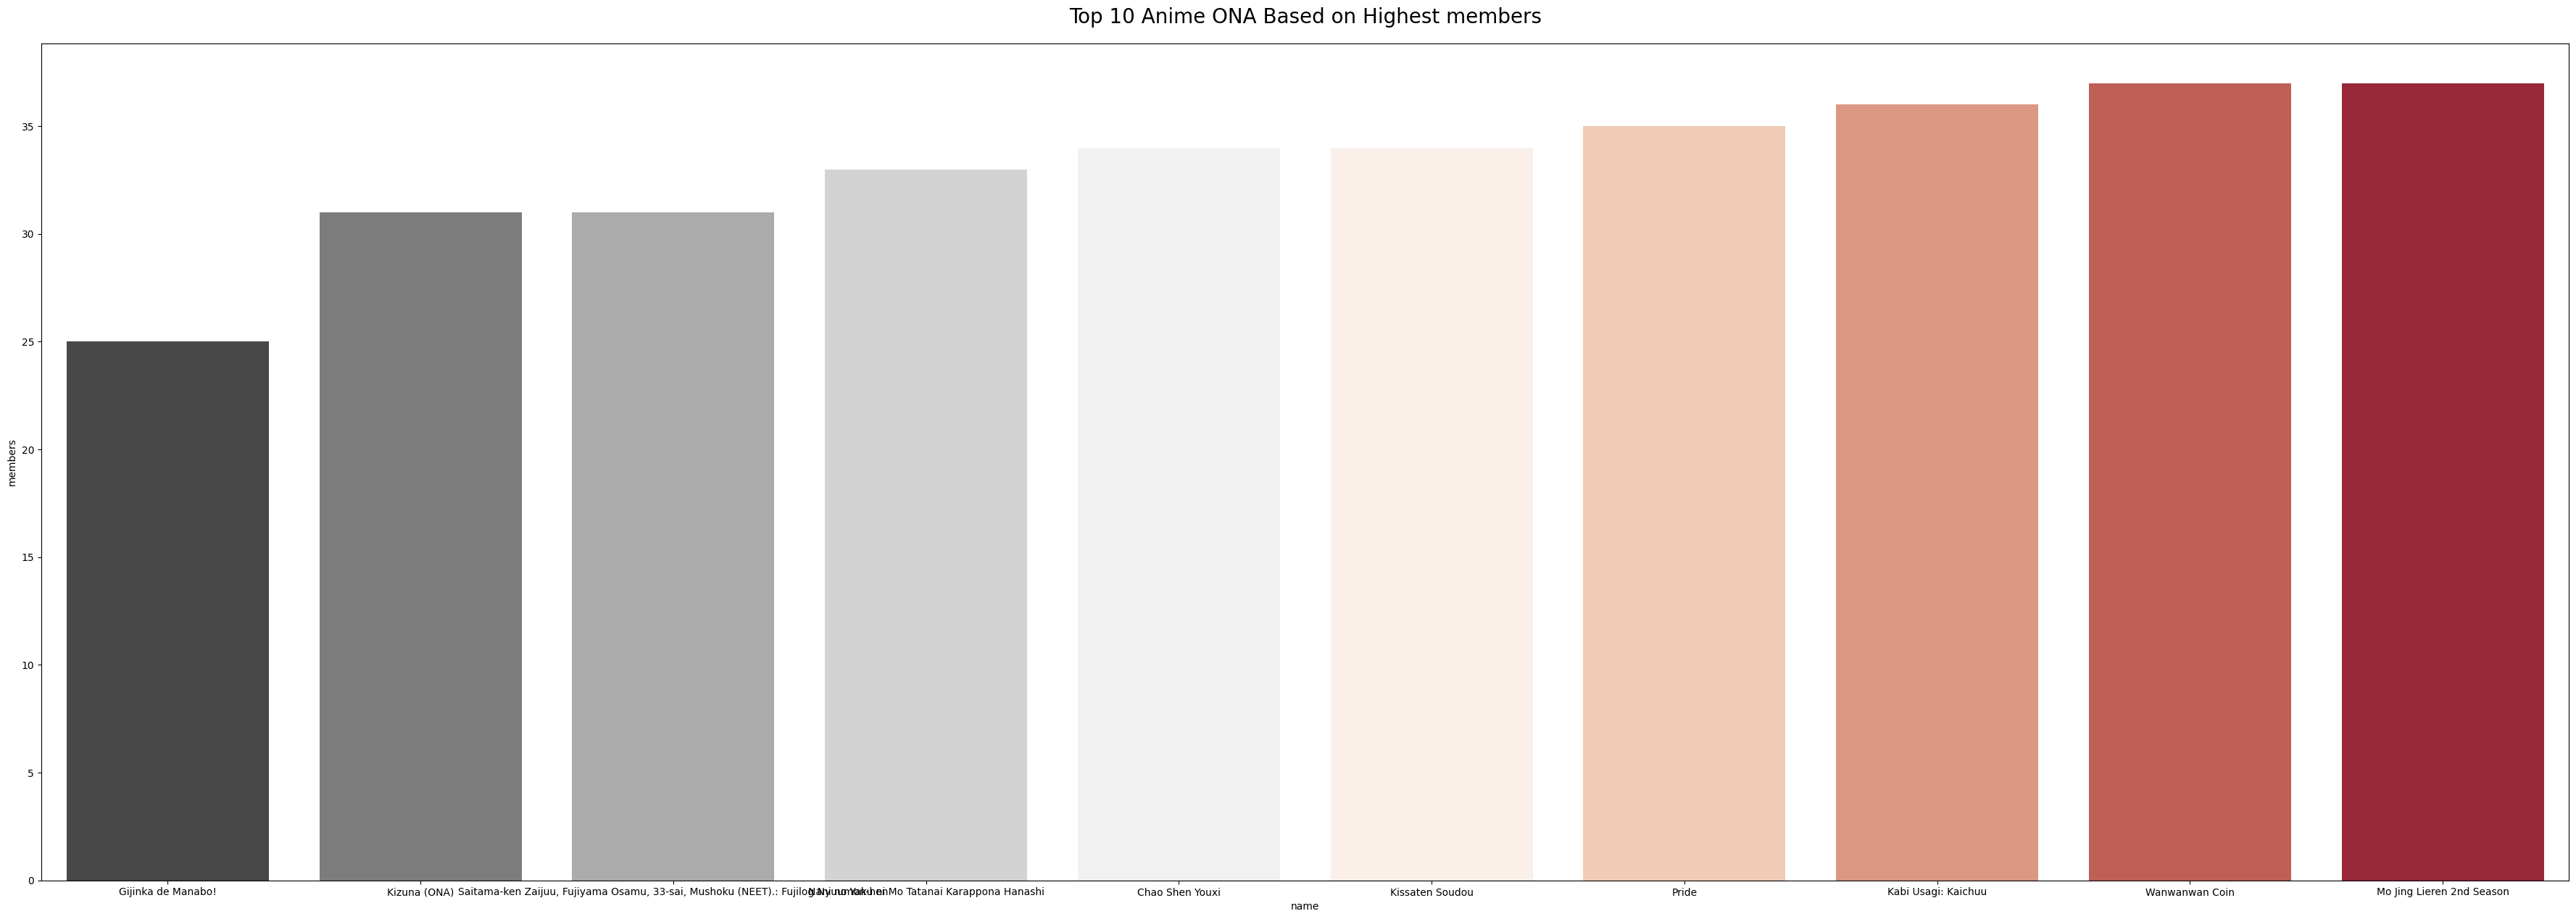

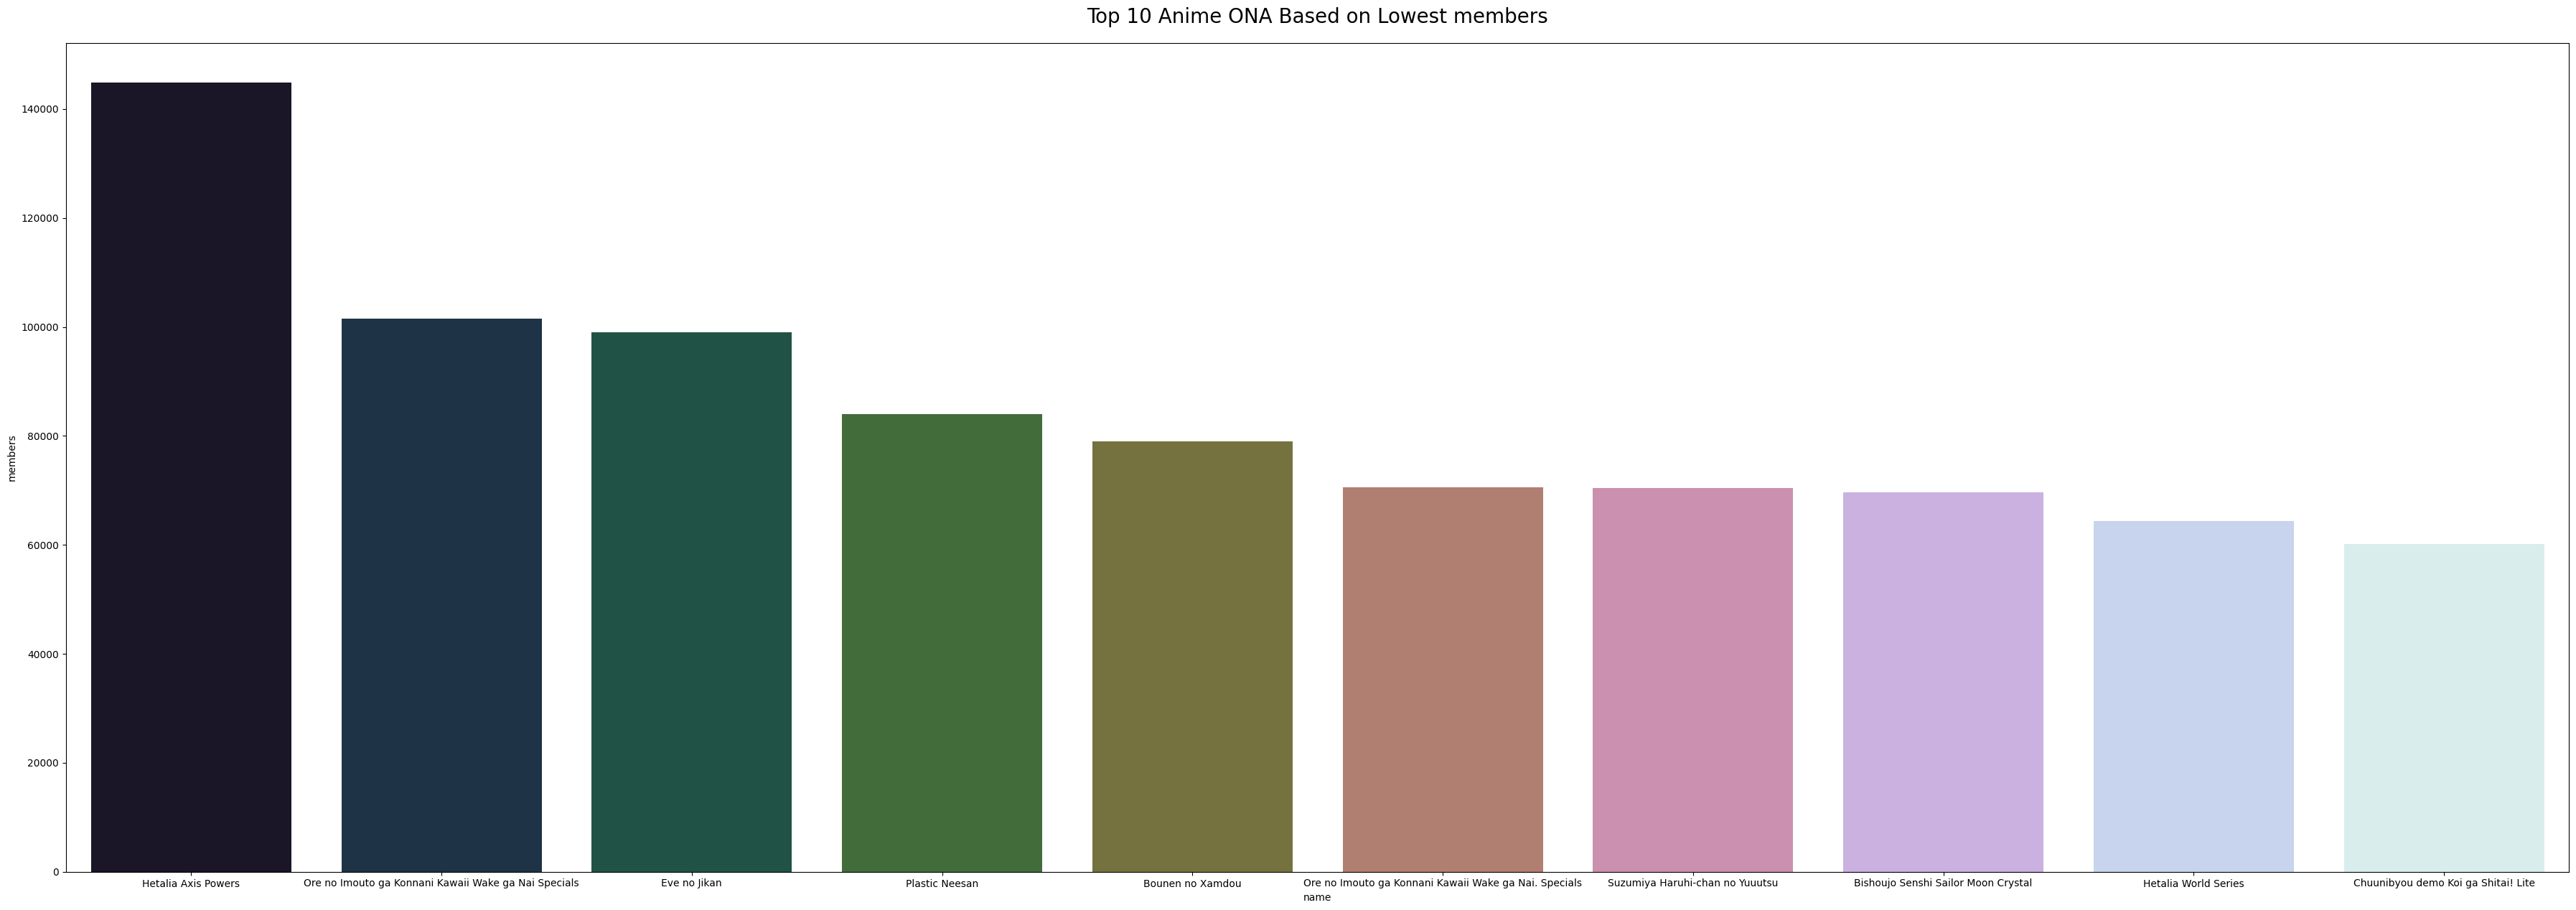

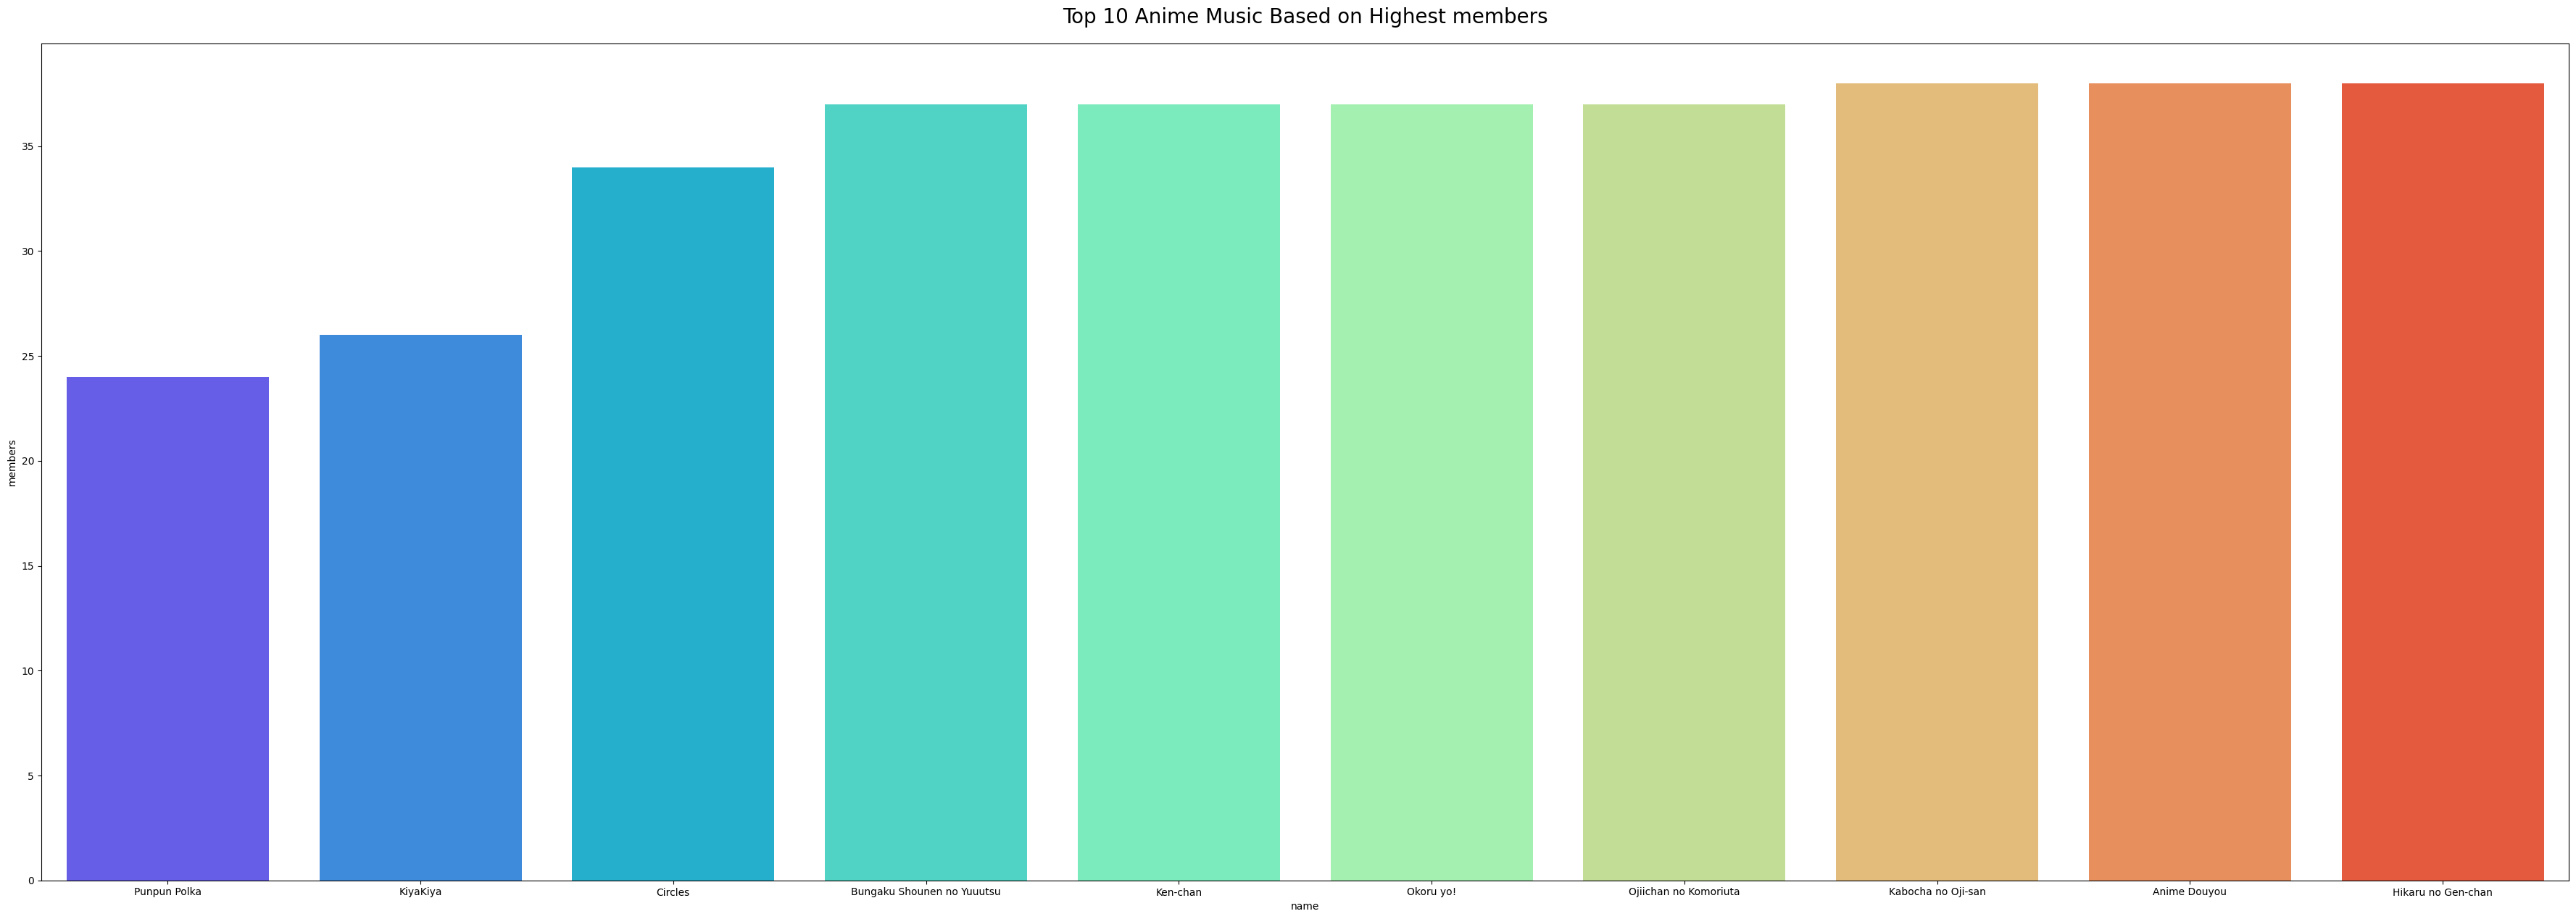

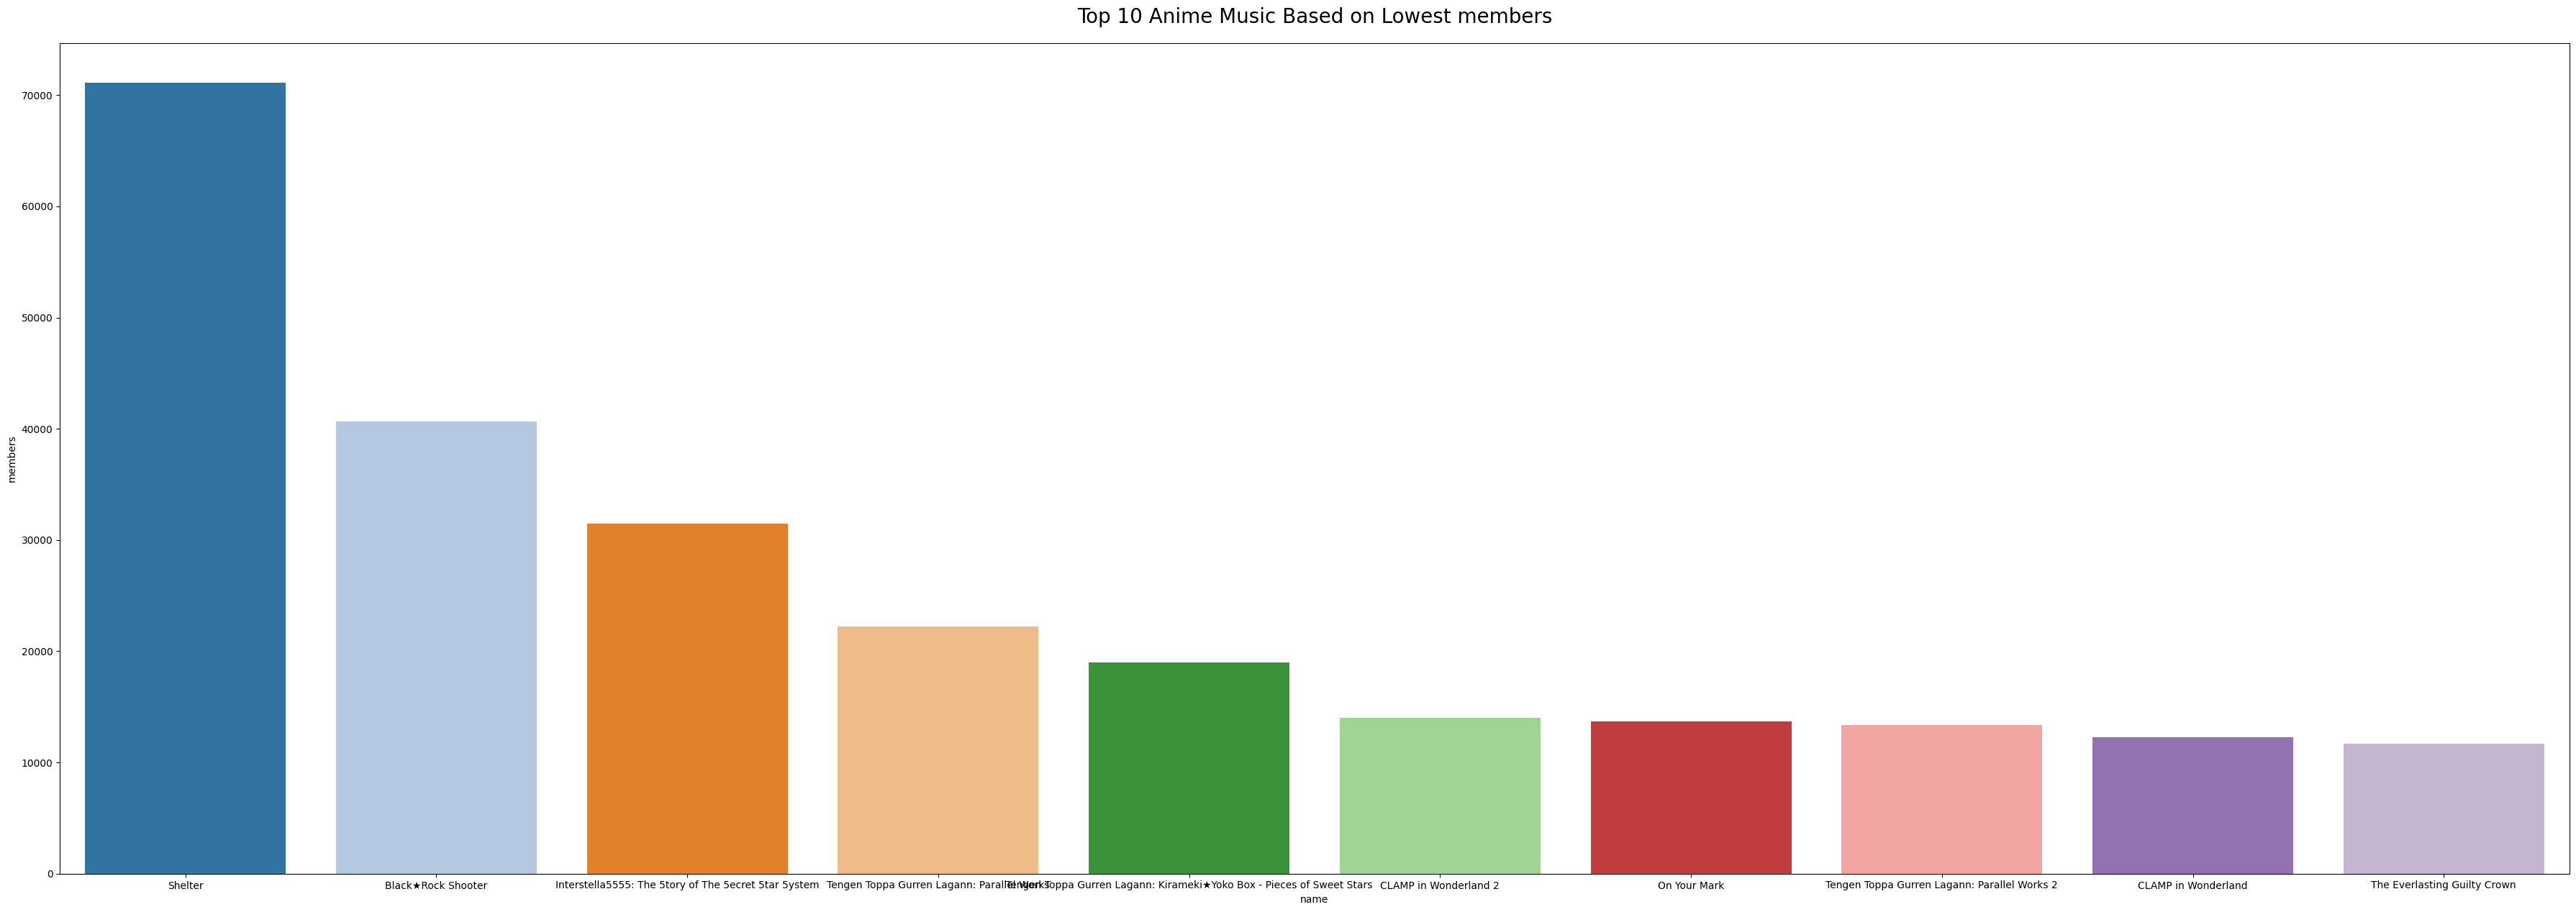

In [40]:
anime_types = data['type'].value_counts().index
anime_cols = ['rating','members']
val = 'Highest'
horl = [True,False]
col_num = 4
for i,col in enumerate(anime_cols):
    for type in anime_types:
        if i == 1:
            col_num = 5
        for torf in horl:
            if torf == False:
                val = 'Lowest'
            else:
                val = 'Highest'
            plt.figure(figsize=(45,15))
            plt.title(f'Top 10 Anime {type} Based on {val} {col}',pad=20,fontsize=20)
            sns.barplot(x=data[data['type']==f'{type}'].sort_values(by=f'{col}',ascending=torf).iloc[:,0][:10],
                y=data[data['type']==f'{type}'].sort_values(by=f'{col}',ascending=torf).iloc[:,col_num][:10],
                        palette=palette[random.randint(0,len(palette)-1)])
            plt.show()
            print('\n')

In [41]:
data.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [42]:
for val in unique_gens:
    data[val] = [0 for i in range(data.shape[0])]

In [43]:
for index,genres in enumerate(data['genre']) :
    for g in genres.split(','):
        data[f'{g}'].iloc[index]=1

In [44]:
data.head()

,name,genre,type,episodes,rating,members,Drama,Romance,School,Supernatural,...,Supernatural,Samurai,Super Power,Vampire,Space,Hentai,Yaoi,Hentai,Yuri,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
for val in data['type'].value_counts().index:
    data[val] = [0 for i in range(data.shape[0])]

In [46]:
for index,t in enumerate(data['type']):
    data[t].iloc[index]=1

In [47]:
data['type'].value_counts()

TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: type, dtype: int64

In [48]:
data.head()

,name,genre,type,episodes,rating,members,Drama,Romance,School,Supernatural,...,Hentai,Yaoi,Hentai,Yuri,Yaoi,TV,OVA,Movie,Special,ONA
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
df  = data.copy()

In [50]:
df = df.drop(['genre','type'],axis=1)

In [51]:
df.head()

,name,episodes,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,...,Hentai,Yaoi,Hentai,Yuri,Yaoi,TV,OVA,Movie,Special,ONA
0,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,Gintama°,51,9.25,114262,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,Steins;Gate,24,9.17,673572,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Gintama&#039;,51,9.16,151266,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
for col in df.columns:
    print(f'UnKnown in {col}  - ',len(df[df[col]=='Unknown'].index))


UnKnown in name  -  0
UnKnown in episodes  -  187
UnKnown in rating  -  0
UnKnown in members  -  0
UnKnown in Drama  -  0
UnKnown in  Romance  -  0
UnKnown in  School  -  0
UnKnown in  Supernatural  -  0
UnKnown in Action  -  0
UnKnown in  Adventure  -  0
UnKnown in  Drama  -  0
UnKnown in  Fantasy  -  0
UnKnown in  Magic  -  0
UnKnown in  Military  -  0
UnKnown in  Shounen  -  0
UnKnown in  Comedy  -  0
UnKnown in  Historical  -  0
UnKnown in  Parody  -  0
UnKnown in  Samurai  -  0
UnKnown in  Sci-Fi  -  0
UnKnown in Sci-Fi  -  0
UnKnown in  Thriller  -  0
UnKnown in Comedy  -  0
UnKnown in  Sports  -  0
UnKnown in  Super Power  -  0
UnKnown in  Space  -  0
UnKnown in  Slice of Life  -  0
UnKnown in  Mecha  -  0
UnKnown in Adventure  -  0
UnKnown in  Music  -  0
UnKnown in  Mystery  -  0
UnKnown in  Seinen  -  0
UnKnown in Fantasy  -  0
UnKnown in  Martial Arts  -  0
UnKnown in  Vampire  -  0
UnKnown in  Shoujo  -  0
UnKnown in  Horror  -  0
UnKnown in  Police  -  0
UnKnown in  Psycho

In [54]:
print(df.shape)
df = df.drop(df[df['episodes']=='Unknown'].index)
print('Droped Unknown values :' ,df.shape)

(12017, 91)
Droped Unknown values : (11830, 91)


In [55]:
df.head()

,name,episodes,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,...,Hentai,Yaoi,Hentai,Yuri,Yaoi,TV,OVA,Movie,Special,ONA
0,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,Gintama°,51,9.25,114262,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,Steins;Gate,24,9.17,673572,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Gintama&#039;,51,9.16,151266,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df.iloc[:,3:6] = std.fit_transform(df.iloc[:,3:6])

In [57]:
df.head()

,name,episodes,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,...,Hentai,Yaoi,Hentai,Yuri,Yaoi,TV,OVA,Movie,Special,ONA
0,Kimi no Na wa.,1,9.37,3.289181,3.340400,2.793221,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Fullmetal Alchemist: Brotherhood,64,9.26,13.999758,-0.299365,-0.358010,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,Gintama°,51,9.25,1.729322,-0.299365,-0.358010,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,Steins;Gate,24,9.17,11.830805,-0.299365,-0.358010,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Gintama&#039;,51,9.16,2.397637,-0.299365,-0.358010,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df.to_csv('cleaned.csv')